In [17]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Checking Z value for outlier treatment
from scipy import stats

from sklearn.decomposition import PCA

#splitting the dataset into training and testing. 60:20:20 
# 60% for training, 20% for validation and 20% for testing.
from sklearn.model_selection import train_test_split

#picking models for prediction.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#ensemble models for better performance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#error evaluation
from sklearn.metrics import mean_squared_error

#ignore warning to make notebook prettier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [18]:
#displays all rows and all columns without cutting anything.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
print(url)
adult_data = pd.read_csv(url)
adult_data.head().T
#Here we just import out data from a UCI Url . Using pd.read_csv() - to read csv file

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data


,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


In [20]:
column_names = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data = pd.read_csv(url, names=column_names)
adult_data.head()
# previously we saw there is no header to this data. so here we adding all header columns. 

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
adult_data = adult_data.replace(to_replace = '%?%', value = np.nan) #replaces everything with a '?' with Nan
adult_data.isna().sum()

# we also observe that some of our data has ? as a information which is not accetable while analysis. so we replace this with NAN Value


Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

We now need to treat the missing data. For this, we will check the columns and replace those values with the Mode if they are categorical (if the mode is really high compared to other values) or the median if the value is numeric.
Before that we need to check for the types of data in each column (categorical or numeric)

In [22]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [23]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [24]:
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hrs_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [25]:
len(categorical_columns)

9

In [ ]:
#We will be checking for the count of the categorical data and getting inferences from it.

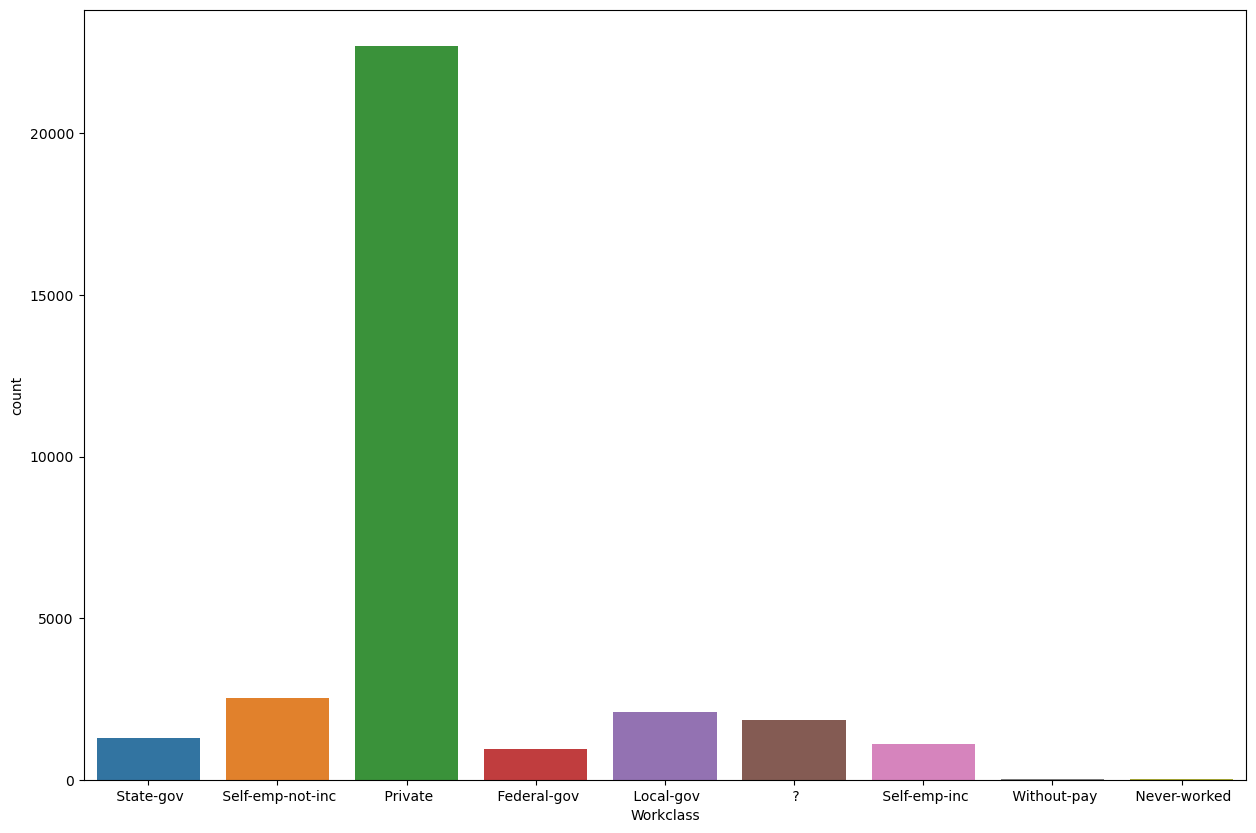

In [26]:
#categorical analysis
plt.figure(figsize = (15,10))
sns.countplot(adult_data['Workclass'])
plt.show()

We realize that most of the people in the survey belong to the Private sector. This is a biased data as we barely have any information on the other kind of workclasses.

In [27]:
adult_data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [34]:
adult_data.groupby(['Workclass', 'Earning_potential']).size()

Workclass          Earning_potential
 ?                  <=50K                1645
                    >50K                  191
 Federal-gov        <=50K                 589
                    >50K                  371
 Local-gov          <=50K                1476
                    >50K                  617
 Never-worked       <=50K                   7
 Private            <=50K               17733
                    >50K                 4963
 Self-emp-inc       <=50K                 494
                    >50K                  622
 Self-emp-not-inc   <=50K                1817
                    >50K                  724
 State-gov          <=50K                 945
                    >50K                  353
 Without-pay        <=50K                  14
dtype: int64

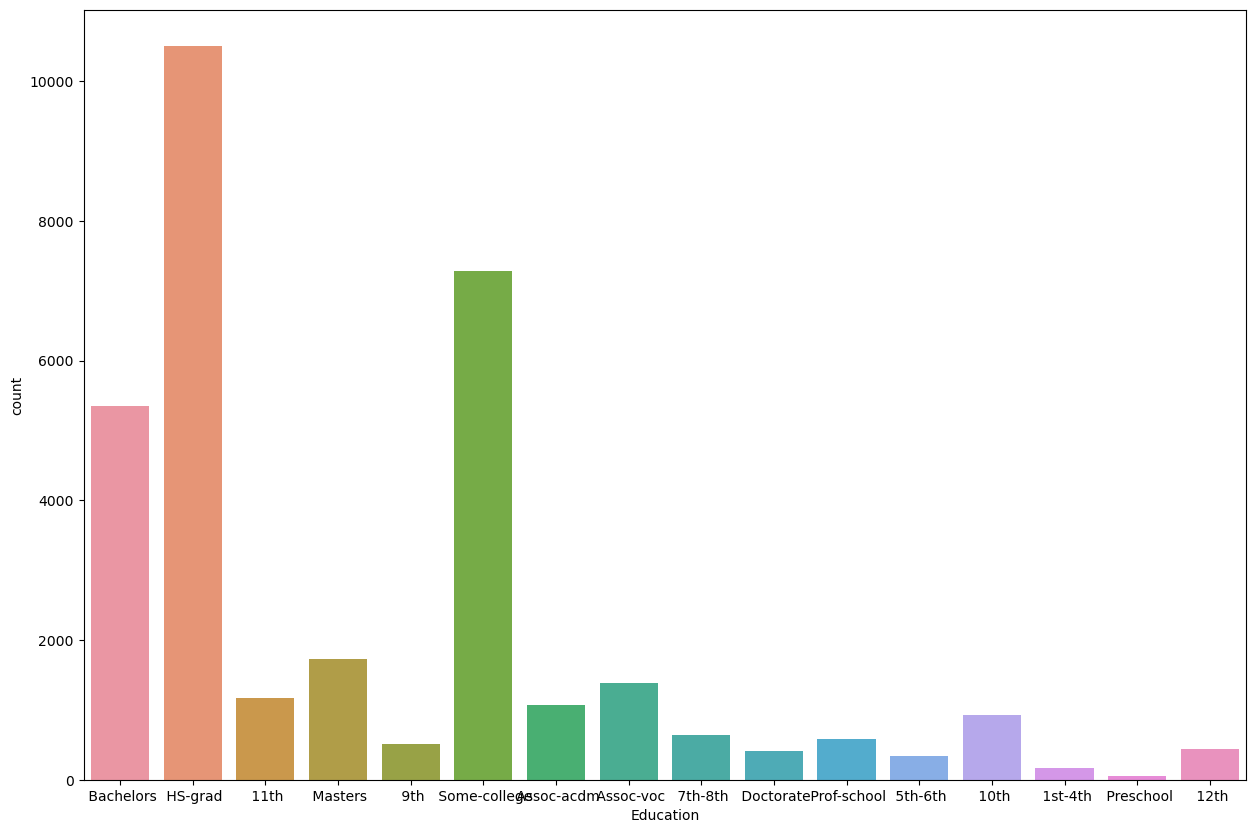

In [35]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[1]])
plt.show()

This is an interesting graph as most of the people in the survey have either attended HS-grad, have a Bachelor's degree or have attended some collage.

In [65]:
adult_data['Education'].value_counts()


11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [66]:
adult_data.groupby(['Education', 'Earning_potential']).size()

Education  Earning_potential
0          0                     871
           1                      62
1          0                    1115
           1                      60
2          0                     400
           1                      33
3          0                     162
           1                       6
4          0                     317
           1                      16
5          0                     606
           1                      40
6          0                     487
           1                      27
7          0                     802
           1                     265
8          0                    1021
           1                     361
9          0                    3134
           1                    2221
10         0                     107
           1                     306
11         0                    8826
           1                    1675
12         0                     764
           1                     959
13       

From this we understand that most people with lower level of education usually earn less than 50k. There are exceptions however and that may be so because of their experiences or learning things on their own. Or just being really good at their trade.
Only for bachelors we see the gap between people earning >50k and <=50k is fairly low. That may be so because bachelors is a degree with many trades involved and talent and hardwork usually pays off real well.
Everyone who has not studied beyond preschool earns less than 50k
On the other hand people who have persued higher education like Masters and Doctorate are more likely to earn >50k. We need to analyze other factors to trim this down.

In [38]:
adult_data.groupby(['Education', 'Workclass']).size()


Education      Workclass        
 10th           ?                    100
                Federal-gov            6
                Local-gov             31
                Never-worked           2
                Private              695
                Self-emp-inc          19
                Self-emp-not-inc      67
                State-gov             13
 11th           ?                    118
                Federal-gov            9
                Local-gov             36
                Never-worked           1
                Private              923
                Self-emp-inc          14
                Self-emp-not-inc      60
                State-gov             14
 12th           ?                     40
                Federal-gov            5
                Local-gov             19
                Private              333
                Self-emp-inc           7
                Self-emp-not-inc      19
                State-gov             10
 1st-4th        ?       

This gives us insigts on the relationship between workclass and education.
we see that the only people who work without pay are the ones who had Assoc-acdm, are HS-Grads or those who went to some collage.
We also see that no matter the educational level, the highest number of people in each category work in the private sector.
The mode of each of those columns is of the private sector as well.

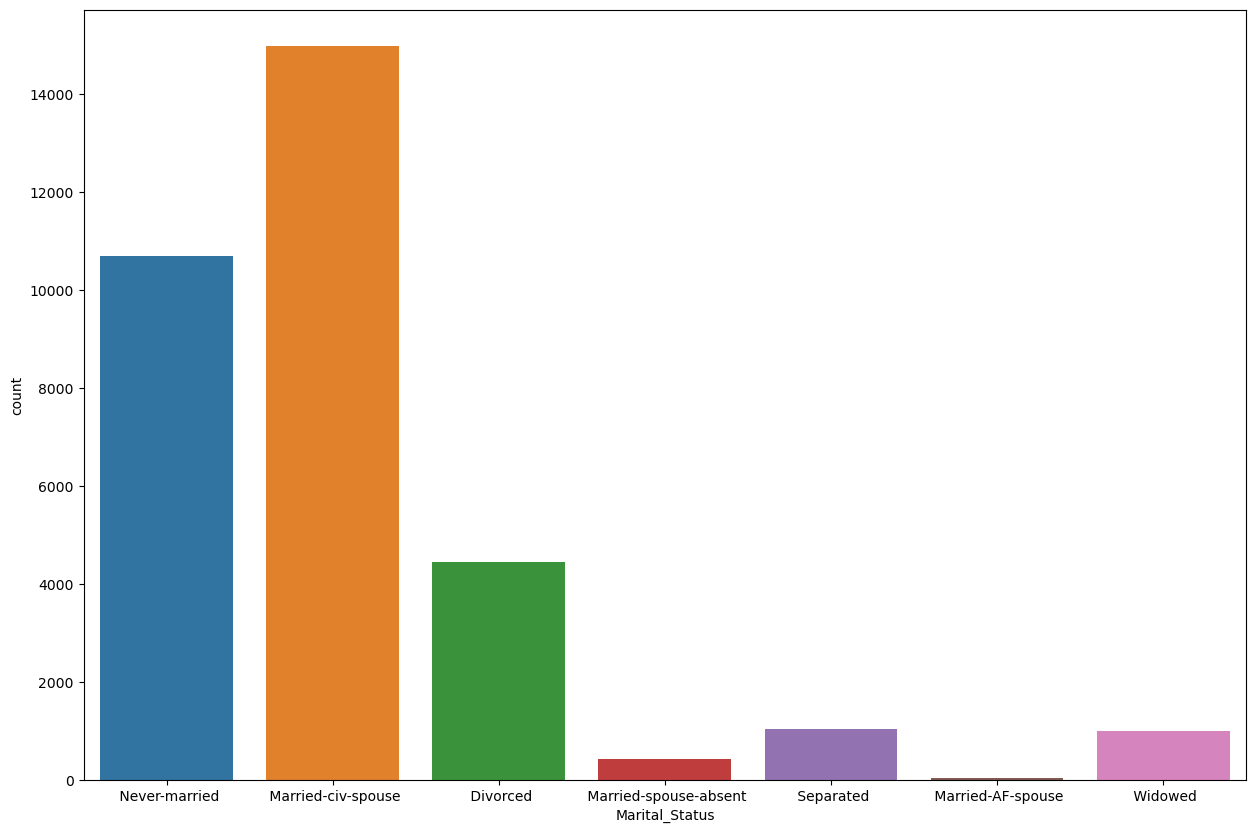

In [39]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[2]])
plt.show()

In [40]:
adult_data['Marital_Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [41]:
adult_data.groupby(['Marital_Status', 'Earning_potential']).size()

Marital_Status          Earning_potential
 Divorced                <=50K                3980
                         >50K                  463
 Married-AF-spouse       <=50K                  13
                         >50K                   10
 Married-civ-spouse      <=50K                8284
                         >50K                 6692
 Married-spouse-absent   <=50K                 384
                         >50K                   34
 Never-married           <=50K               10192
                         >50K                  491
 Separated               <=50K                 959
                         >50K                   66
 Widowed                 <=50K                 908
                         >50K                   85
dtype: int64

We see that when a person is married and has a civilian spouce, they tend to have a lower difference between the two classses of income potential.

The biggest difference is among the people who are never married. Almost all of them earn less than 50k. This may be because they are relatively younger so they have less experience or there can be a range of other factors (like education).

In [42]:
adult_data.groupby(['Marital_Status', 'Workclass']).size()

Marital_Status          Workclass        
 Divorced                ?                    184
                         Federal-gov          168
                         Local-gov            369
                         Never-worked           1
                         Private             3119
                         Self-emp-inc         100
                         Self-emp-not-inc     292
                         State-gov            210
 Married-AF-spouse       ?                      2
                         Federal-gov            3
                         Private               15
                         Self-emp-not-inc       2
                         State-gov              1
 Married-civ-spouse      ?                    636
                         Federal-gov          471
                         Local-gov           1023
                         Never-worked           1
                         Private             9732
                         Self-emp-inc         837
        

We again see that in all the marital statuses, private sector is where most people work. It usually is the case with an overwhelming majority.
Except for people with a married civilian spouse where local-govt and self-employed-not-inc had 1600+ and 1000+ entries with private sectors were at 9.7k.

In [43]:
adult_data.groupby(['Marital_Status', 'Education']).size()

Marital_Status          Education    
 Divorced                10th             120
                         11th             130
                         12th              39
                         1st-4th           10
                         5th-6th           20
                         7th-8th           73
                         9th               64
                         Assoc-acdm       203
                         Assoc-voc        234
                         Bachelors        546
                         Doctorate         33
                         HS-grad         1613
                         Masters          233
                         Preschool          1
                         Prof-school       55
                         Some-college    1069
 Married-AF-spouse       Assoc-acdm         2
                         Assoc-voc          1
                         Bachelors          4
                         HS-grad           13
                         Some-college     

Most people who did their masters, bachelors or went to some collage tend to have civilian spouses. Bachelors and people who went to some collage are also amongst those who were not married.
This may be because of the number of people with bachelors, hs-grads and people going to some collage are higher than most other recordings. However, a lot of the people who did their masters did prefer civilian spouses.

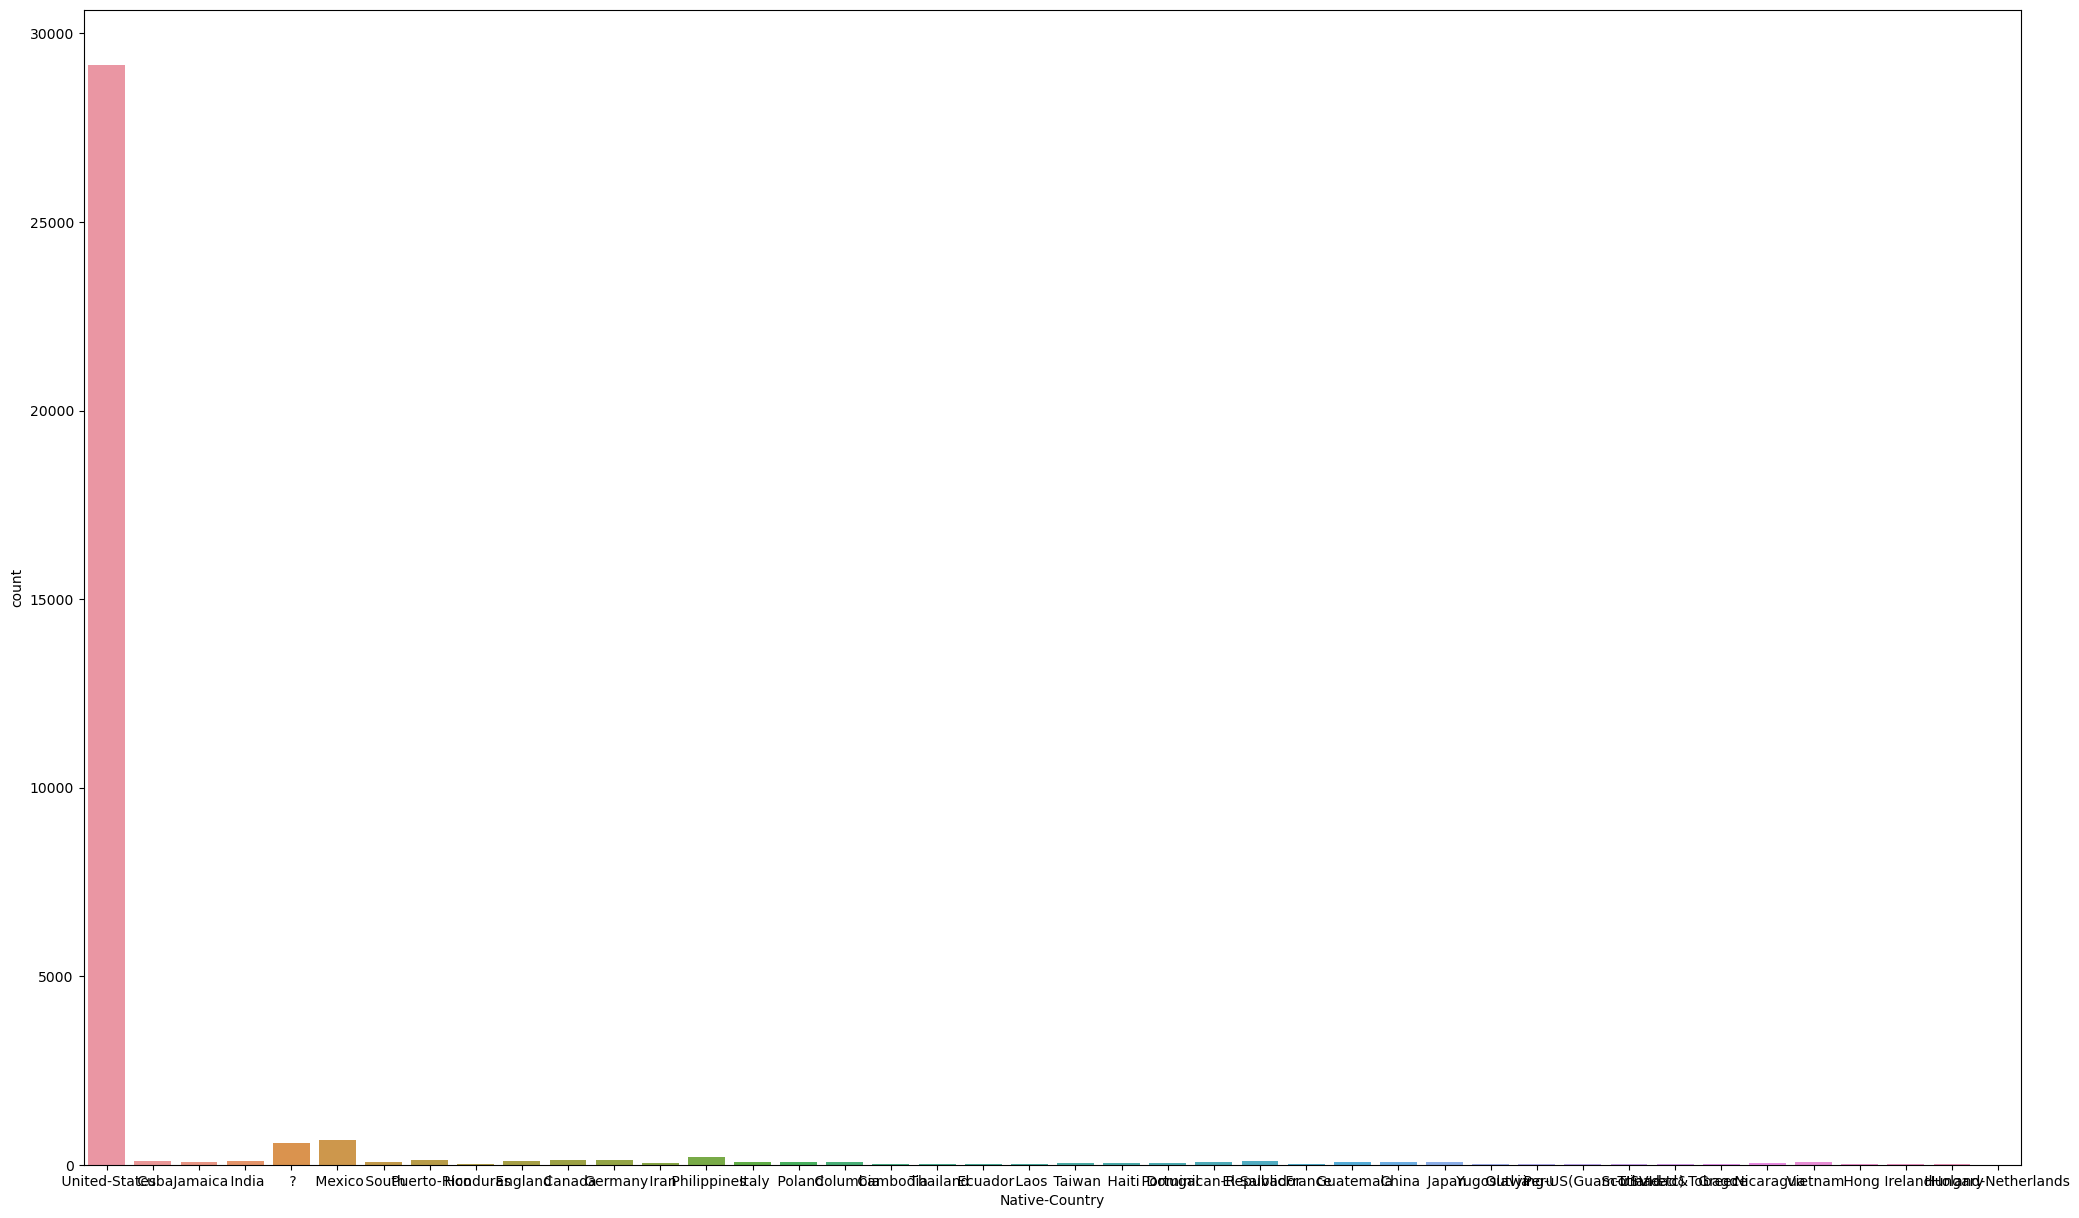

In [44]:
plt.figure(figsize=(25,15))
sns.countplot(adult_data['Native-Country'])
plt.show()

That is a highly biased dataset. So we can just replace all the null values with US and it will be fine.
We also notice that there is no inconsistency in the data (like US, USA, United States in one dataset) so we do not need to worry about it

In [45]:
adult_data['Native-Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [8]:
adult_data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Occupation does not have a biased report so we can check for it's connections with other columns to see if we can replace the null values with anything.



In [47]:
adult_data.groupby(['Occupation', 'Education']).size()

Occupation          Education    
 ?                   10th             102
                     11th             119
                     12th              40
                     1st-4th           12
                     5th-6th           30
                     7th-8th           73
                     9th               51
                     Assoc-acdm        47
                     Assoc-voc         61
                     Bachelors        173
                     Doctorate         15
                     HS-grad          533
                     Masters           48
                     Preschool          5
                     Prof-school       18
                     Some-college     516
 Adm-clerical        10th              38
                     11th              67
                     12th              38
                     5th-6th            6
                     7th-8th           11
                     9th               14
                     Assoc-acdm       193


As we had expected, Bachelors, HS-Grads and some-collage rule this side as well. But there are some interesting things we found.
In Tech SUpport, Bachelors, Some-collage are mostly present with HS-grads coming in third followed by Assoc-voc.
Bachelors, Masters and Doctorates prefer Prof-speciality fields of work. Most masters and Doctorates work in this field. They are also the ones who usually get paid >50k so this makes a lot of sense.

In [48]:
adult_data.groupby(['Occupation', 'Workclass']).size()

Occupation          Workclass        
 ?                   ?                   1836
                     Never-worked           7
 Adm-clerical        Federal-gov          317
                     Local-gov            283
                     Private             2833
                     Self-emp-inc          31
                     Self-emp-not-inc      50
                     State-gov            253
                     Without-pay            3
 Armed-Forces        Federal-gov            9
 Craft-repair        Federal-gov           64
                     Local-gov            146
                     Private             3195
                     Self-emp-inc         106
                     Self-emp-not-inc     531
                     State-gov             56
                     Without-pay            1
 Exec-managerial     Federal-gov          180
                     Local-gov            214
                     Private             2691
                     Self-emp-inc         

Here again, Private sector is the most preferred sector except for Farming-Fishing where self-emp-not-inc are present in abundence. Since they are usually not the ones who get paid >50k, farming is probably not a very profitable. Most of the people who work without pay also stay in this trade.

<AxesSubplot:xlabel='Race', ylabel='count'>

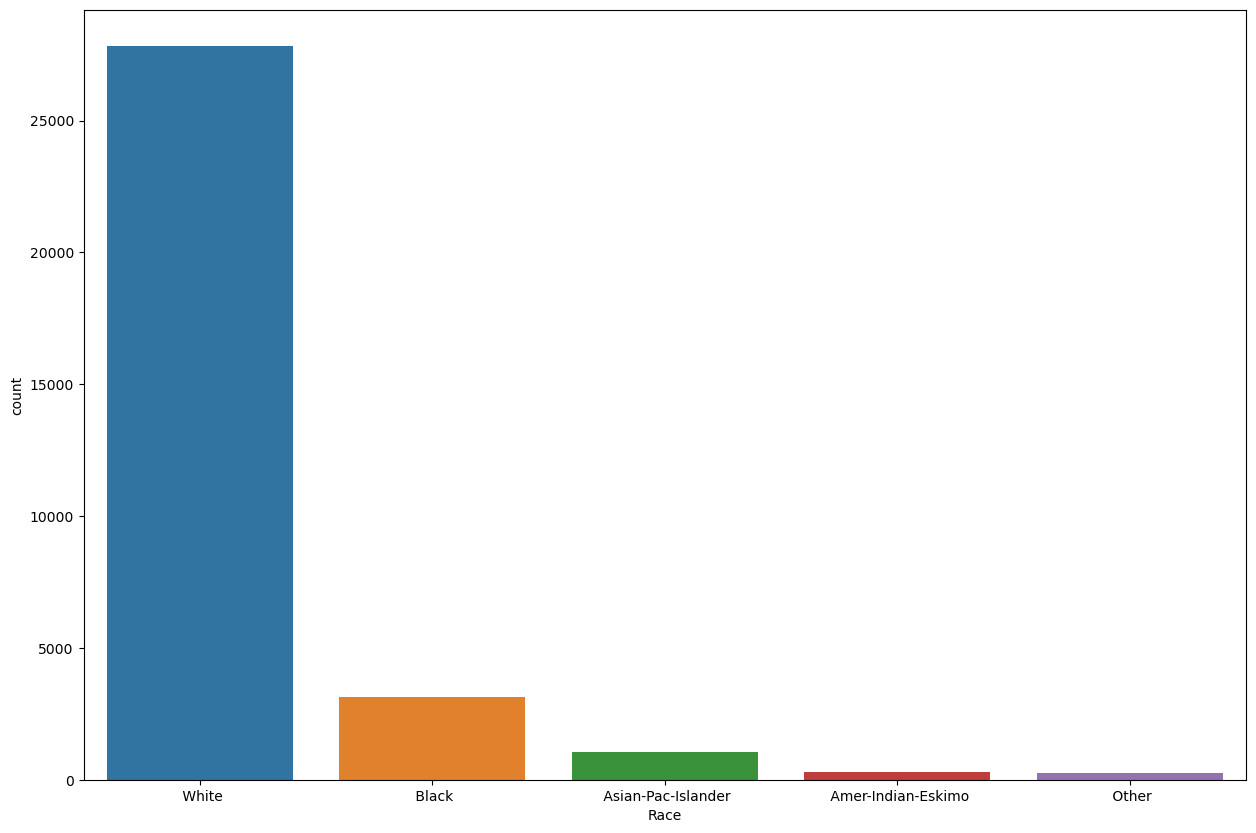

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(adult_data['Race'])

In [50]:
adult_data.groupby(['Race', 'Earning_potential']).size()

Race                 Earning_potential
 Amer-Indian-Eskimo   <=50K                 275
                      >50K                   36
 Asian-Pac-Islander   <=50K                 763
                      >50K                  276
 Black                <=50K                2737
                      >50K                  387
 Other                <=50K                 246
                      >50K                   25
 White                <=50K               20699
                      >50K                 7117
dtype: int64

This is a white dominated dataset and we see that the ratio of race with >50k and <50k is: aie - 7.6 api - 2.7 b - 7.0 o - 9.8 w - 2.9

This concludes that White and Asian-Pac_Islanders have a less ratio between the people earning >50k and <=50k while it is more prominent in the rest of the races, especially for the people tagged 'Other'
This may be because of education. So let's check that.

In [51]:
adult_data.groupby(['Race', 'Education']).size()

Race                 Education    
 Amer-Indian-Eskimo   10th              16
                      11th              14
                      12th               5
                      1st-4th            4
                      5th-6th            2
                      7th-8th            9
                      9th                5
                      Assoc-acdm         8
                      Assoc-voc         19
                      Bachelors         21
                      Doctorate          3
                      HS-grad          119
                      Masters            5
                      Prof-school        2
                      Some-college      79
 Asian-Pac-Islander   10th              13
                      11th              21
                      12th               9
                      1st-4th            5
                      5th-6th           18
                      7th-8th           11
                      9th                9
                   

We see that Most white people are HS-Grads and a lot of them have gone to some collage. The next highs are Bachelors and masters.
We see that most people belonging to the Other category do not have many high degrees and that might explain the low income potential.
We see a lot of people belonging to the Black category are HS-Grads. Since HS-Grads have a high number of people with income potential <=50k, this may explain why the ratio is so high.
For asia-pac-islanders, a lot of people in their category have done masters (compared to other degrees it isnt that low) which may have contributed to their higher income potential.

<AxesSubplot:xlabel='Sex', ylabel='count'>

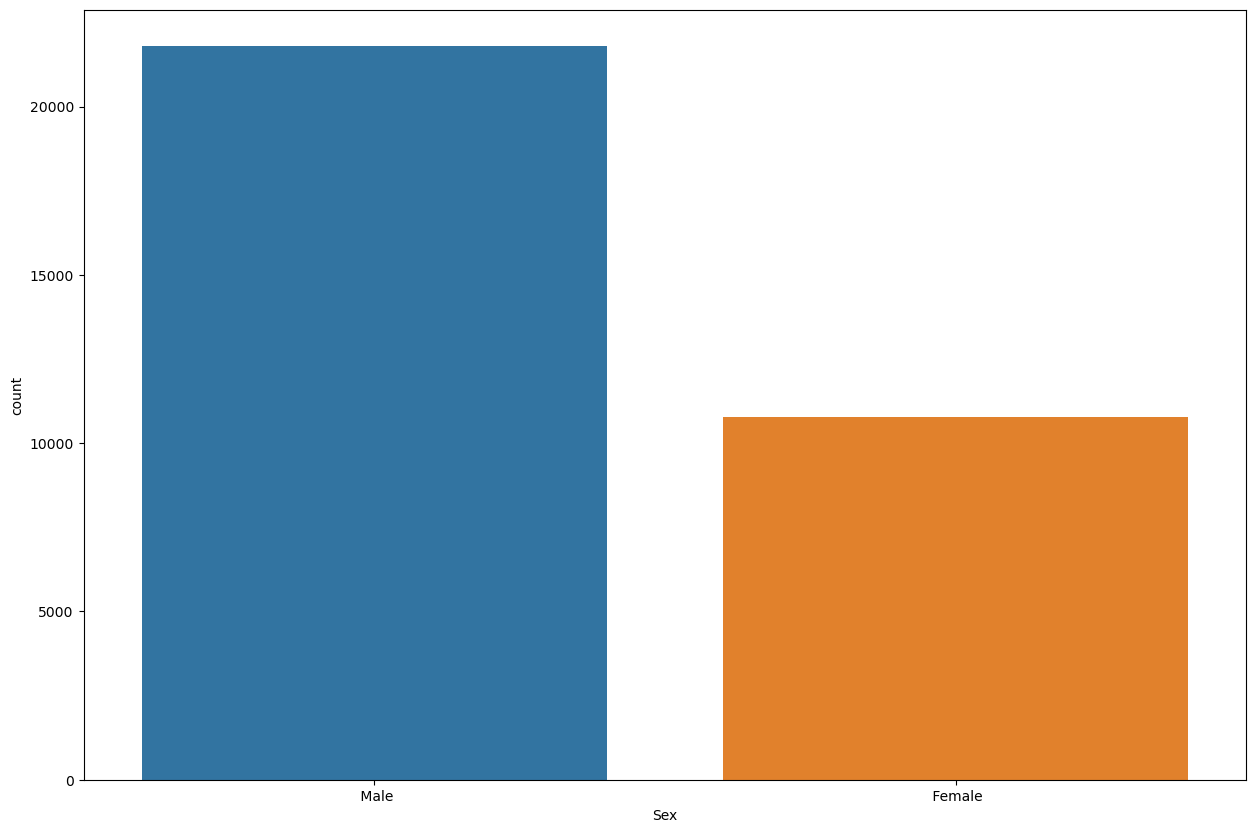

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(adult_data['Sex'])

In [9]:
adult_data.groupby(['Sex', 'Earning_potential']).size()

Sex      Earning_potential
 Female   <=50K                9592
          >50K                 1179
 Male     <=50K               15128
          >50K                 6662
dtype: int64

We see that when it comes to the ratio of Males being paid >50k and <-50k is around 2.3 but for women, the same ratio drops down to 8.1. This implies that women are being paid less. We have to check the same for every occupation to see if women work in occupations that usually pay less. This can go both ways.

In [54]:
adult_data.groupby(['Education', 'Sex']).size()

Education      Sex    
 10th           Female     295
                Male       638
 11th           Female     432
                Male       743
 12th           Female     144
                Male       289
 1st-4th        Female      46
                Male       122
 5th-6th        Female      84
                Male       249
 7th-8th        Female     160
                Male       486
 9th            Female     144
                Male       370
 Assoc-acdm     Female     421
                Male       646
 Assoc-voc      Female     500
                Male       882
 Bachelors      Female    1619
                Male      3736
 Doctorate      Female      86
                Male       327
 HS-grad        Female    3390
                Male      7111
 Masters        Female     536
                Male      1187
 Preschool      Female      16
                Male        35
 Prof-school    Female      92
                Male       484
 Some-college   Female    2806
                

We see that women are a lot more prominent in the lower levels of education and then in bachelors, hsgrads and some-collage. This implies a lot of women quit during school.

In [55]:
adult_data.groupby(['Occupation', 'Sex']).size()

Occupation          Sex    
 ?                   Female     841
                     Male      1002
 Adm-clerical        Female    2537
                     Male      1233
 Armed-Forces        Male         9
 Craft-repair        Female     222
                     Male      3877
 Exec-managerial     Female    1159
                     Male      2907
 Farming-fishing     Female      65
                     Male       929
 Handlers-cleaners   Female     164
                     Male      1206
 Machine-op-inspct   Female     550
                     Male      1452
 Other-service       Female    1800
                     Male      1495
 Priv-house-serv     Female     141
                     Male         8
 Prof-specialty      Female    1515
                     Male      2625
 Protective-serv     Female      76
                     Male       573
 Sales               Female    1263
                     Male      2387
 Tech-support        Female     348
                     Male       580


Women dominate the adm-clerical, other services, priv-house-ervices. However in all the services, a majority of people get paid <=50k.
We may need to check the numeric columns and then plot a heatmap and check the corelation of all the columns with the target in order to get a better idea about the dataset.

In [57]:
#Numerical Analysis
numerical_columns

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'hrs_per_week']

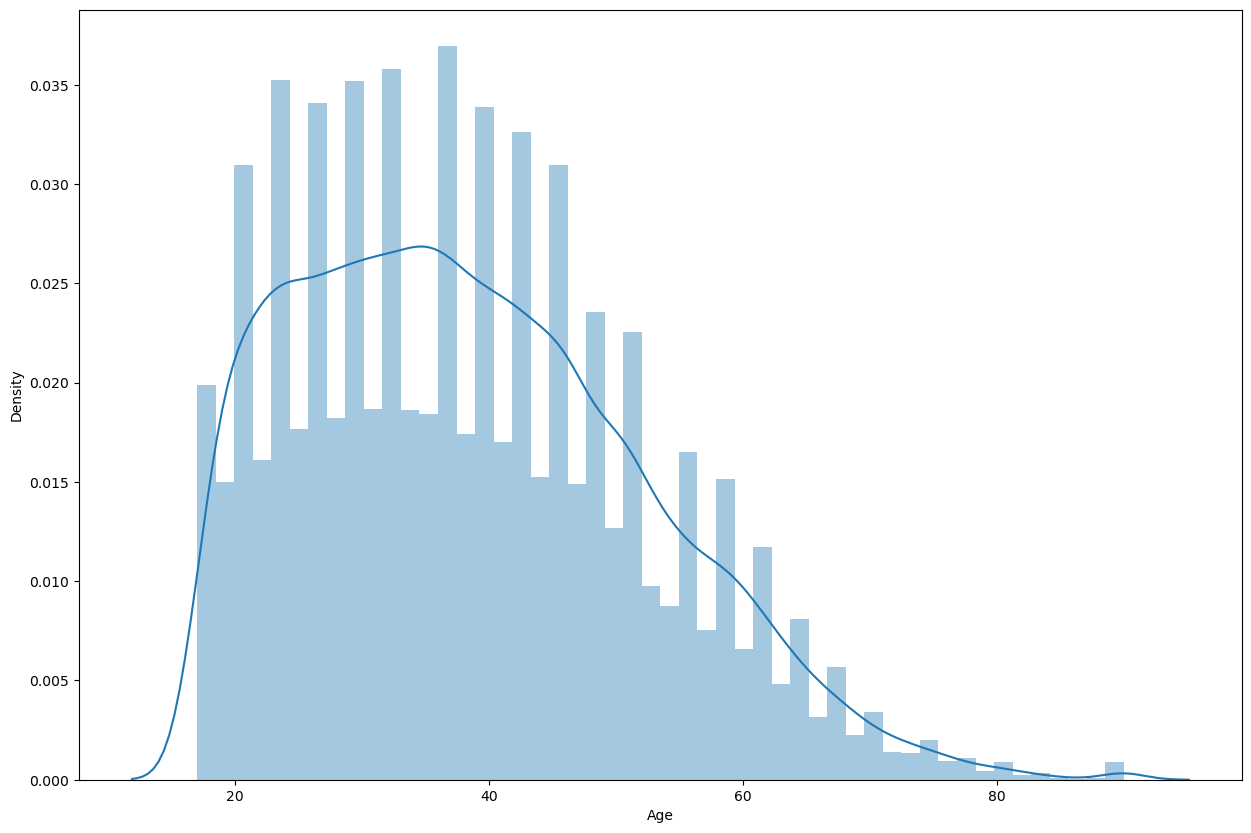

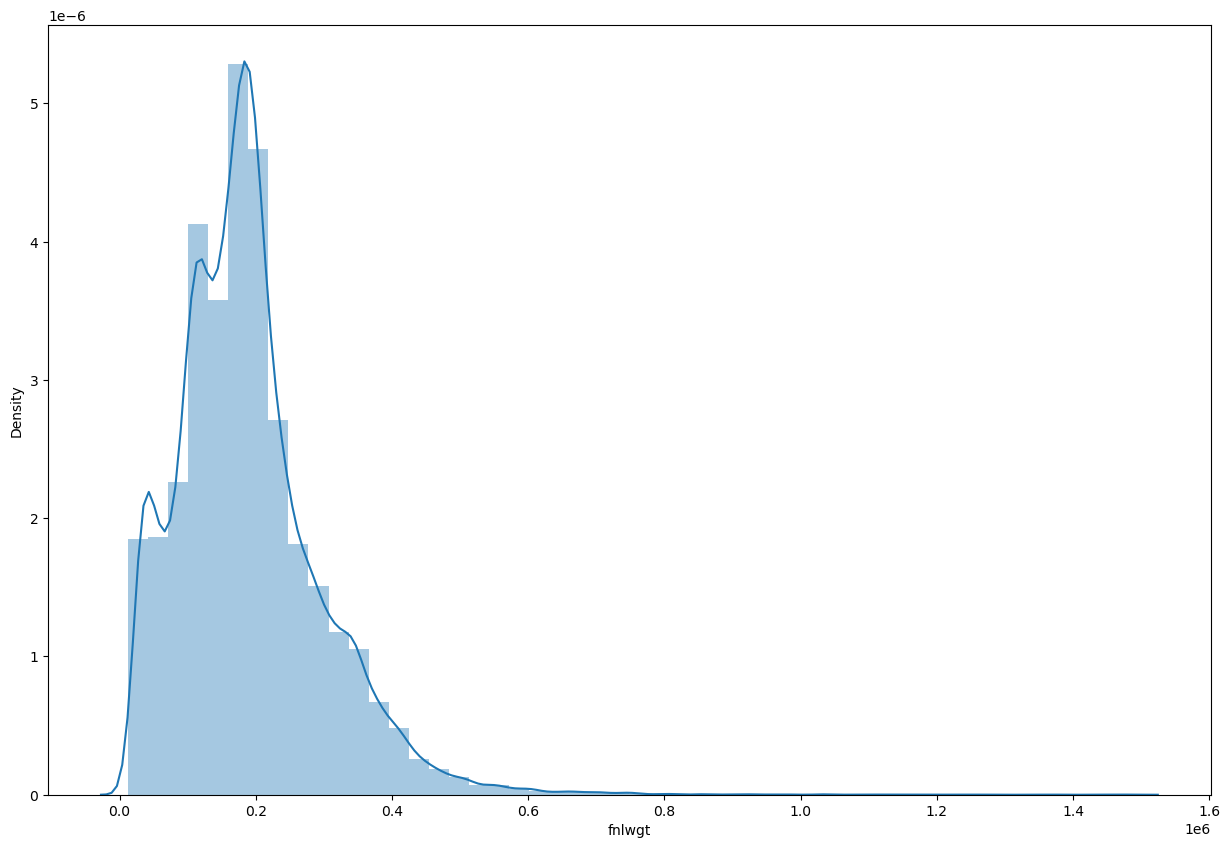

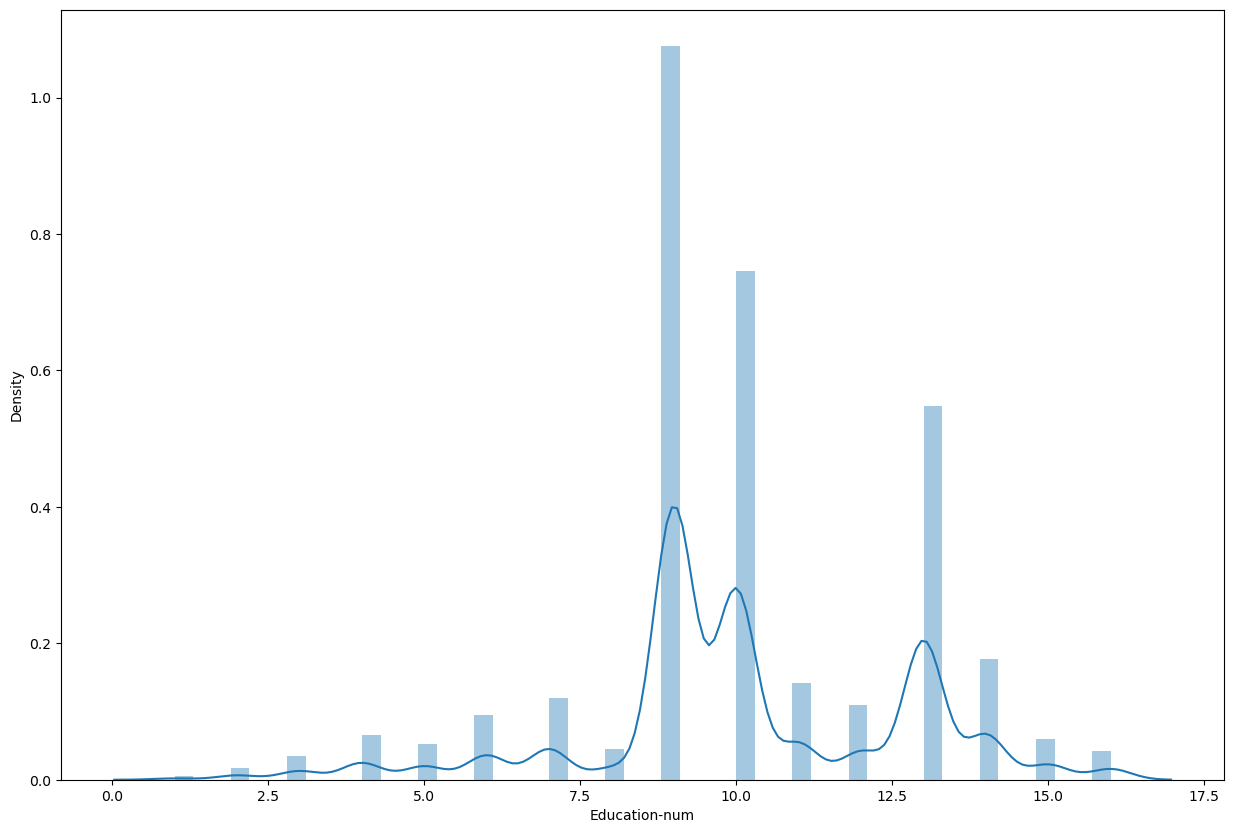

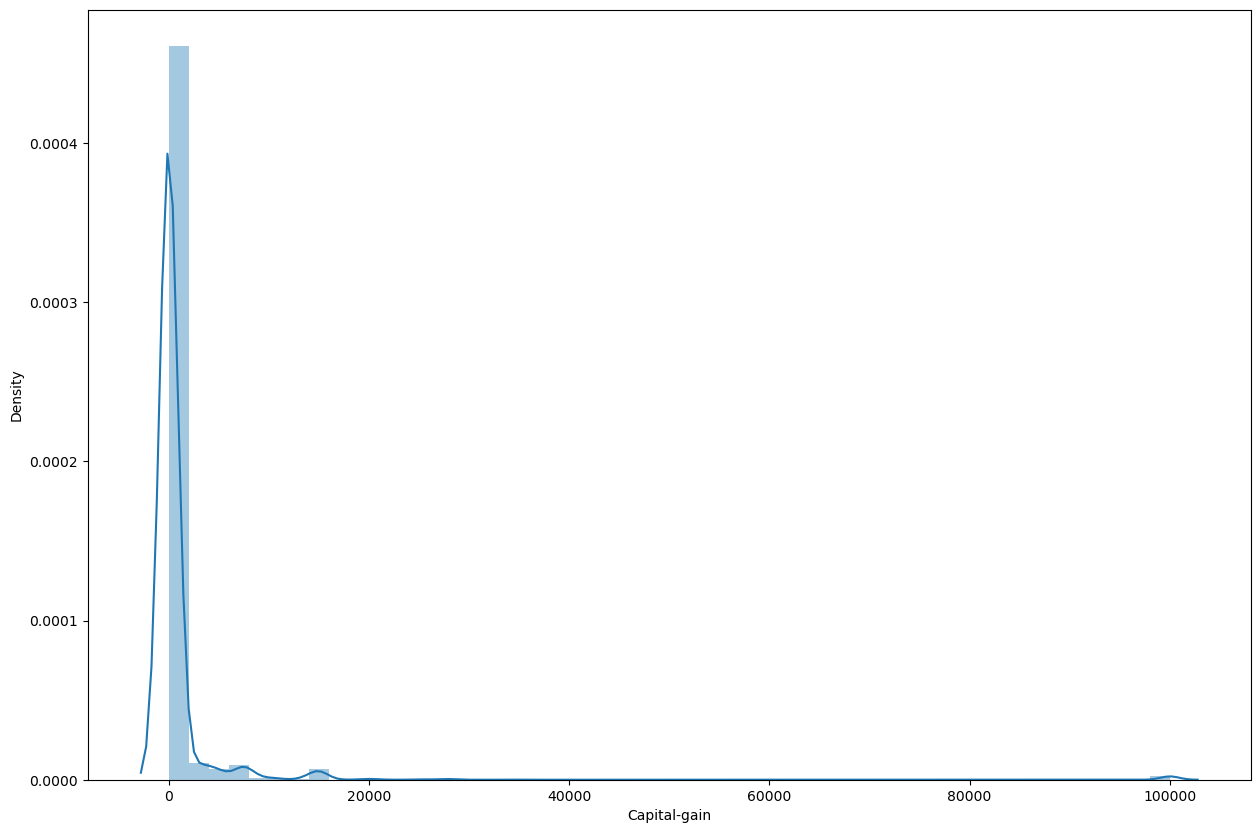

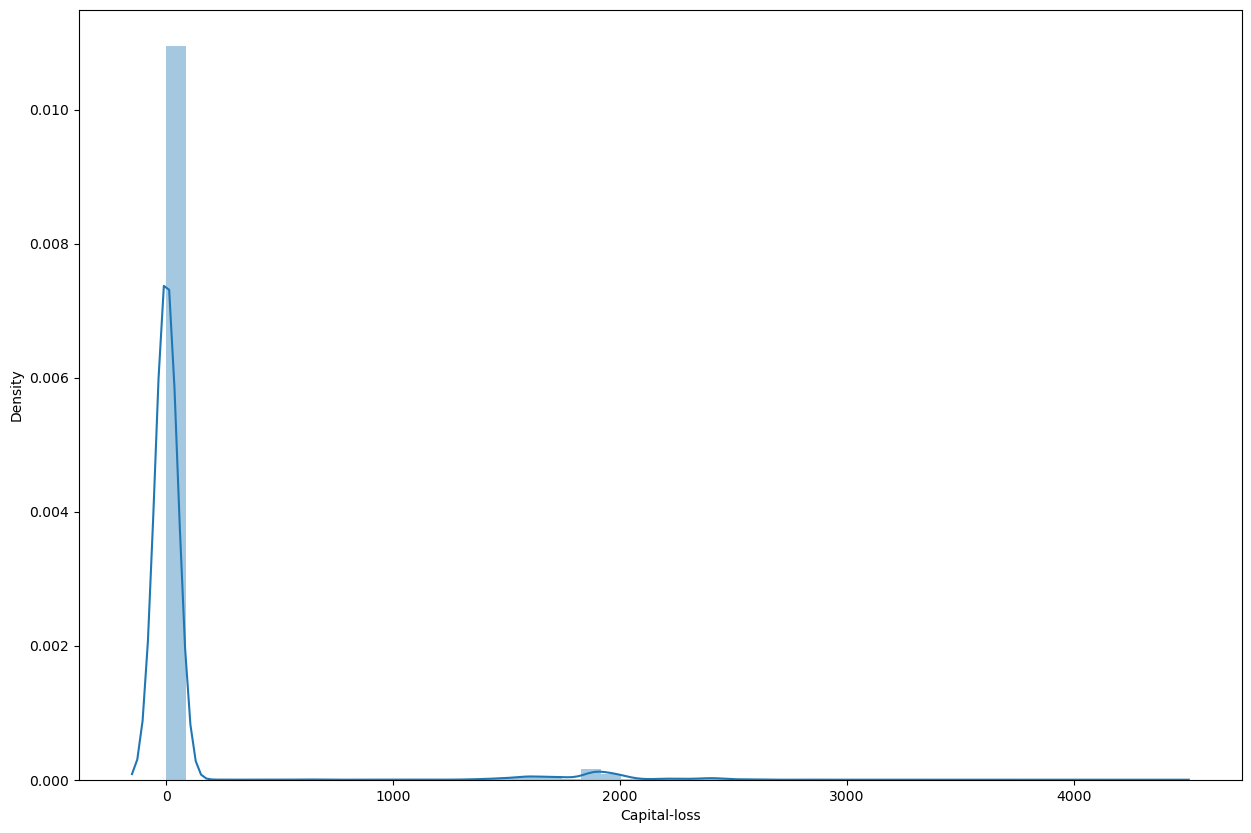

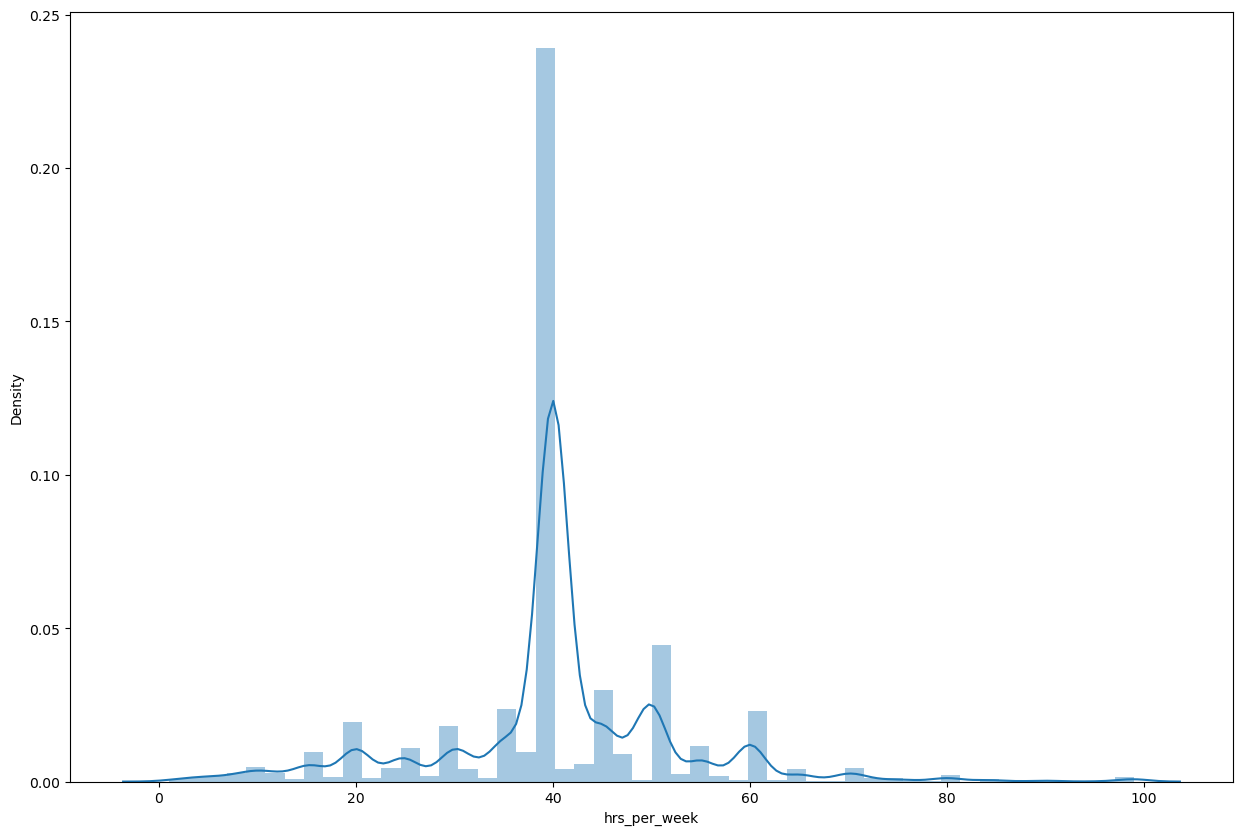

In [58]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.distplot(adult_data[numerical_columns[i]])
plt.show() 

# Too many graphs

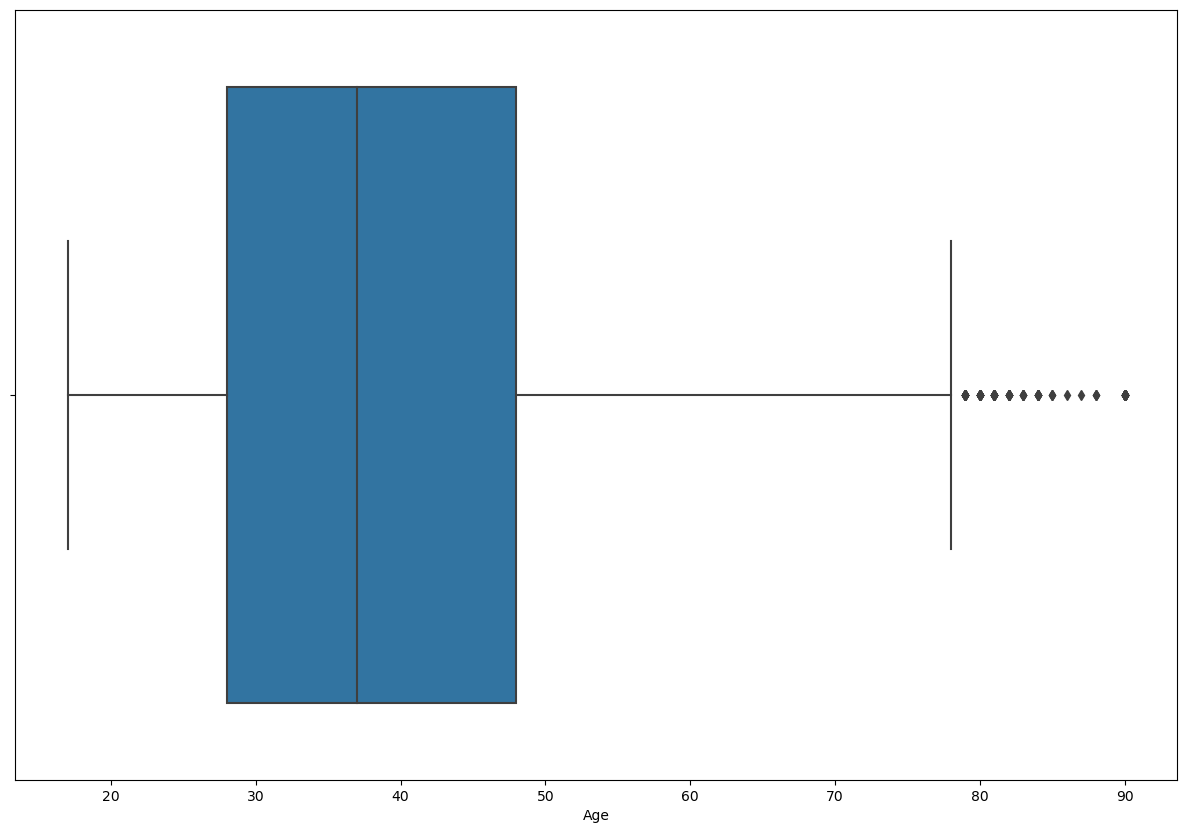

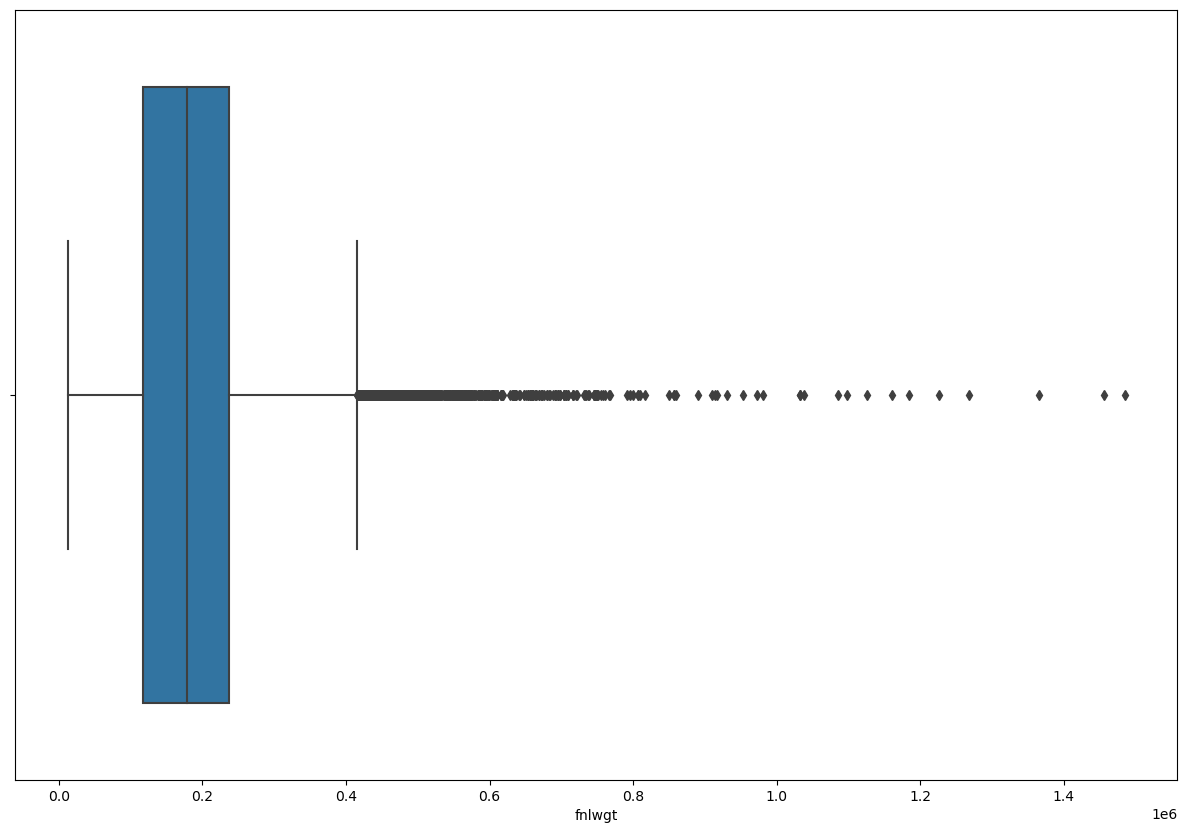

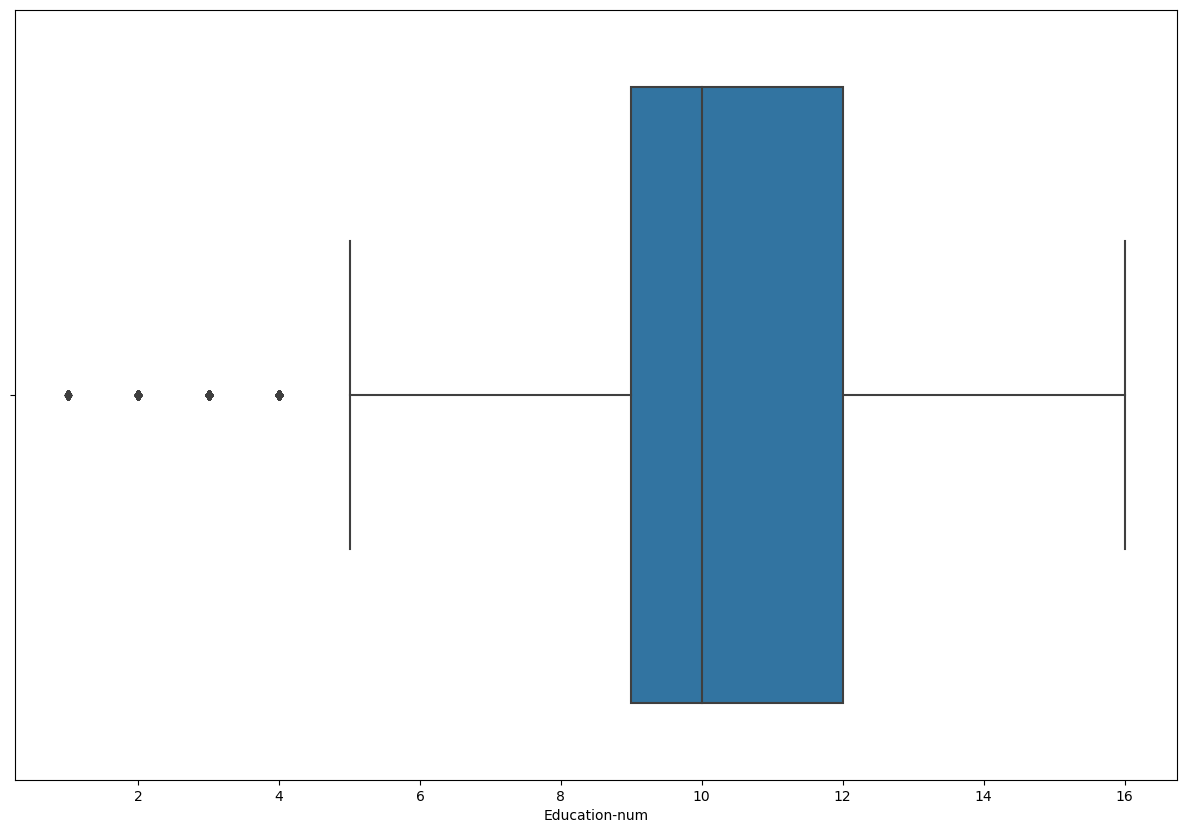

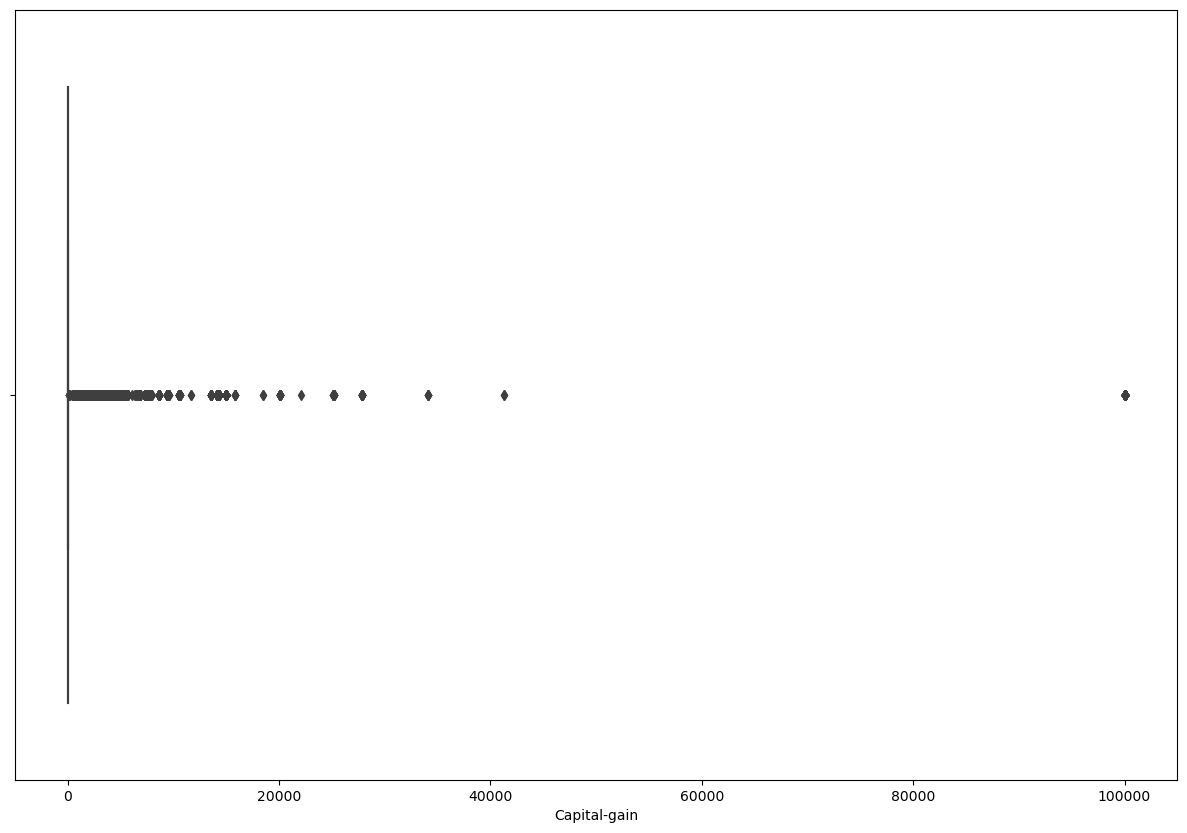

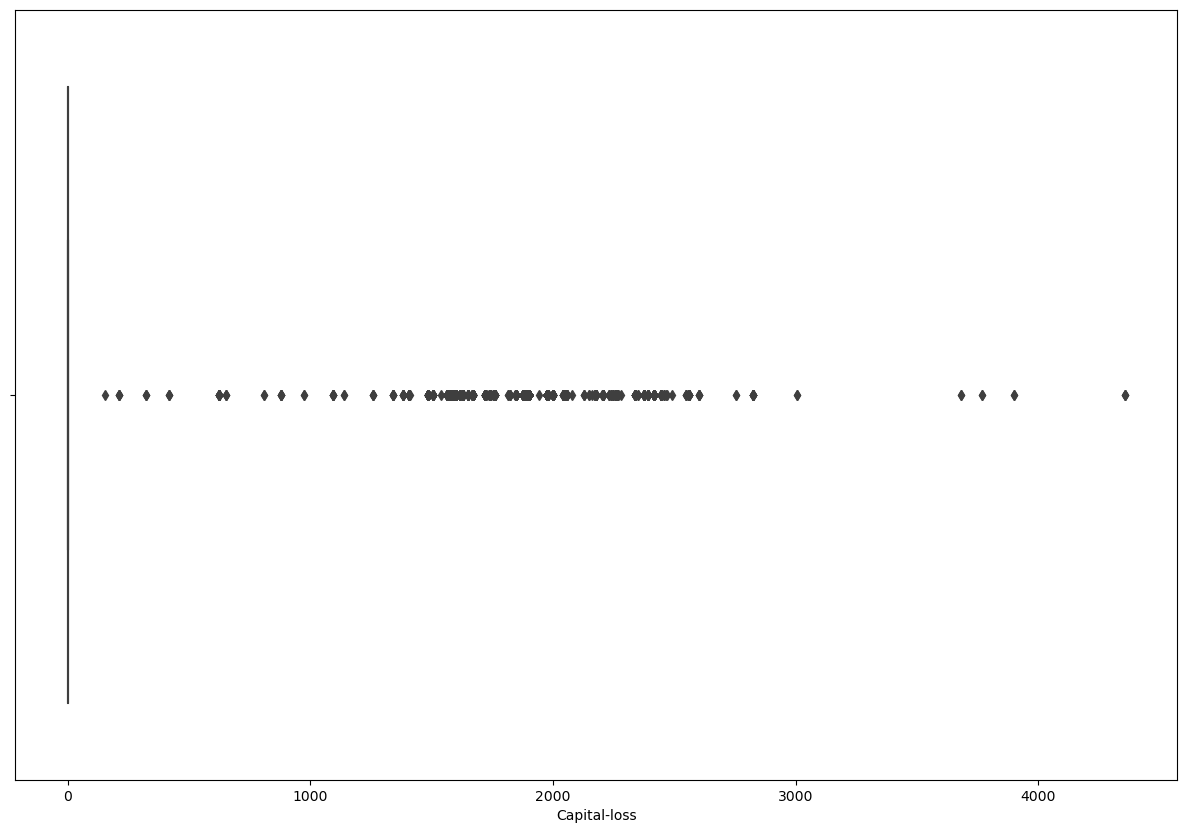

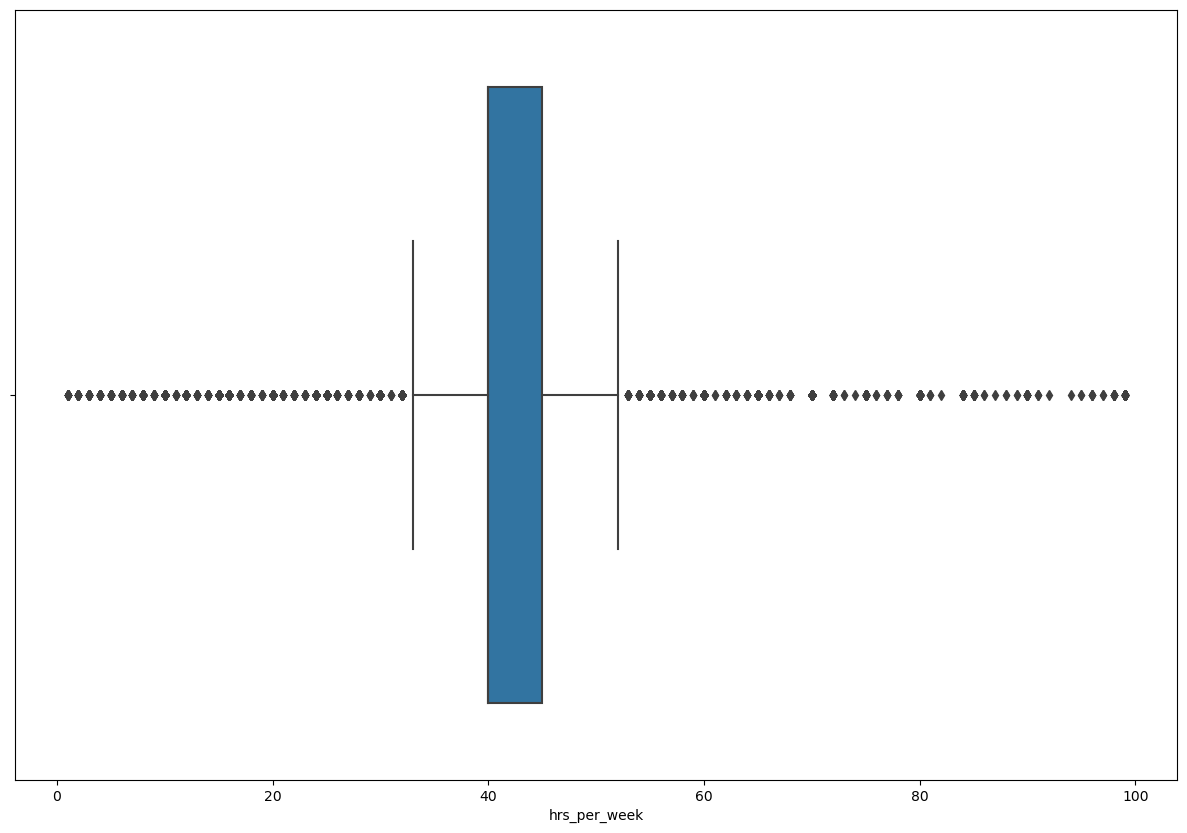

In [59]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(adult_data[numerical_columns[i]])
plt.show() 

# Too many gtaphs

In [60]:
adult_data.var(axis=0)
adult_data.loc[:, numerical_columns].var()

Age              1.860614e+02
fnlwgt           1.114080e+10
Education-num    6.618890e+00
Capital-gain     5.454254e+07
Capital-loss     1.623769e+05
hrs_per_week     1.524590e+02
dtype: float64

In [61]:
var_in_float = adult_data.loc[:, numerical_columns].var()
for i in range(len(numerical_columns)):
    print('{} \t\t {}'.format(numerical_columns[i], round(float(var_in_float[i]), 3)))

Age 		 186.061
fnlwgt 		 11140797791.842
Education-num 		 6.619
Capital-gain 		 54542539.178
Capital-loss 		 162376.938
hrs_per_week 		 152.459


We see that fnlwgt, capital-gain and capital loss have the highest variance. This can occur either because these have a lot of information or... they have few, very extreme values. Let's check those out.

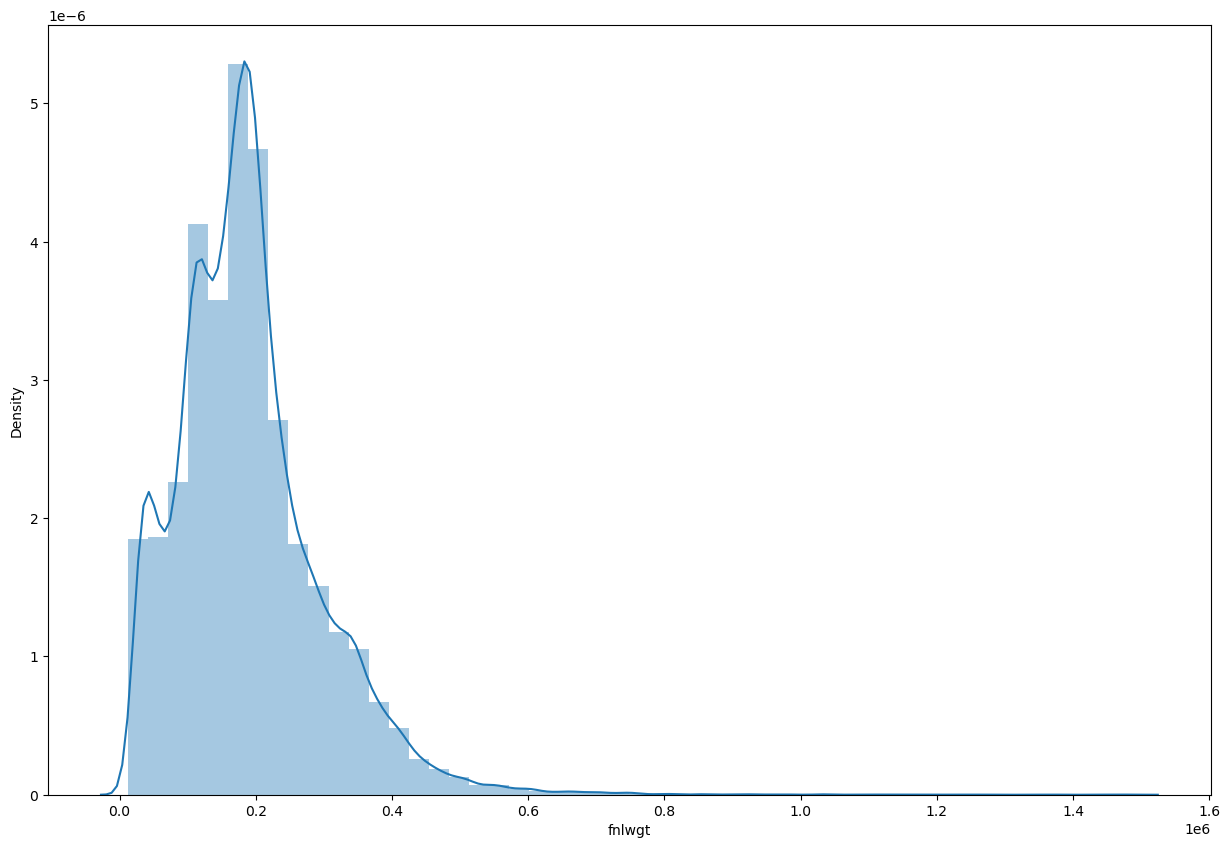

In [62]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['fnlwgt'])
plt.show()

Do not be fooled by the tiny 0.2 steps because at the end, there's a 1e6. It means it is 1.0e+06 or 1000000 or 1 * 10^6 So that 0.2 is actually 200000. That would explain the high variance.

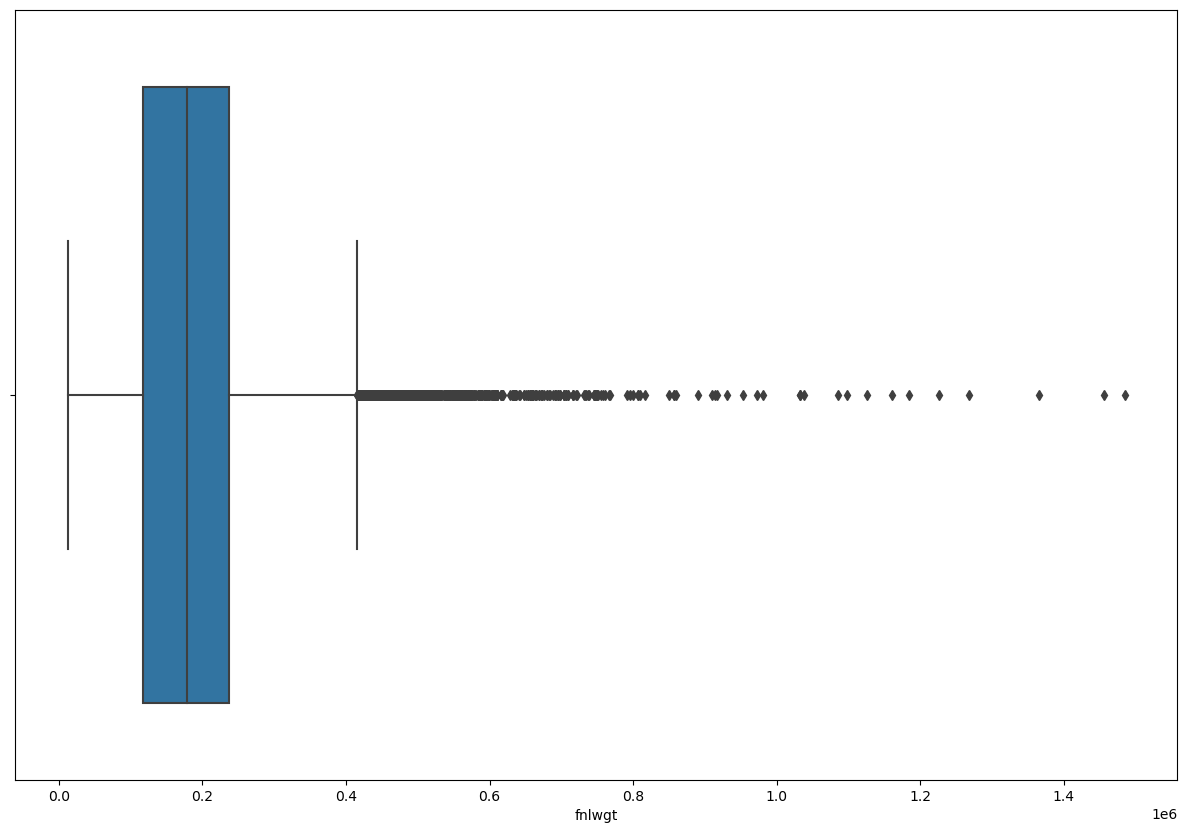

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['fnlwgt'])
plt.show()

We see that there are a large number of outliers here. Our median lies between the 0.2 * 10^6 side but a lot of other points cross our 75th percentile. We will have to treat this column for outliers.

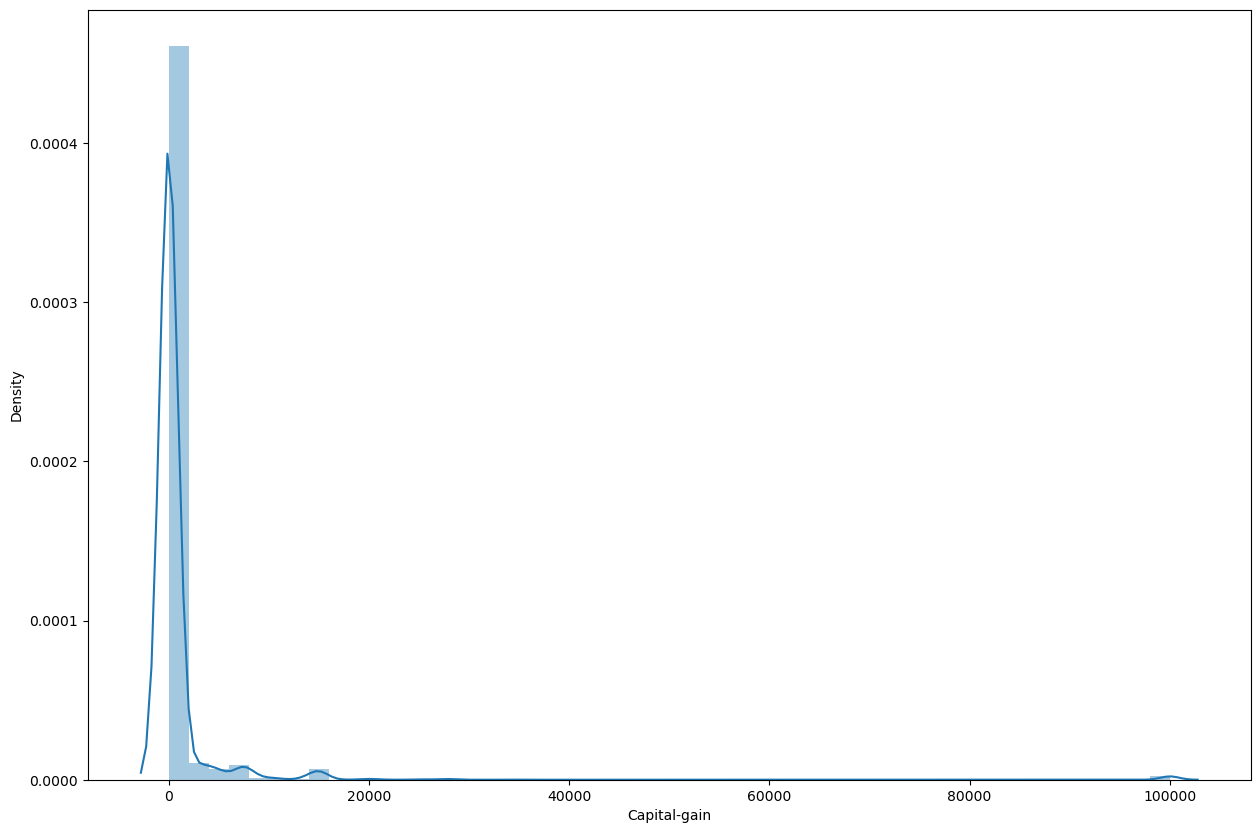

In [64]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-gain'])
plt.show()

This graph is quite interesting. Most of our data tends towards the zero side of the graph. However, some of the data is in the 5k-20k range and there is some data in the 100,000 range as well! Now that outlier right there would throw off our variance by a lot. We need to deal with those outliers eventually or when we try to make models later, we will not be able to make a good prediction.

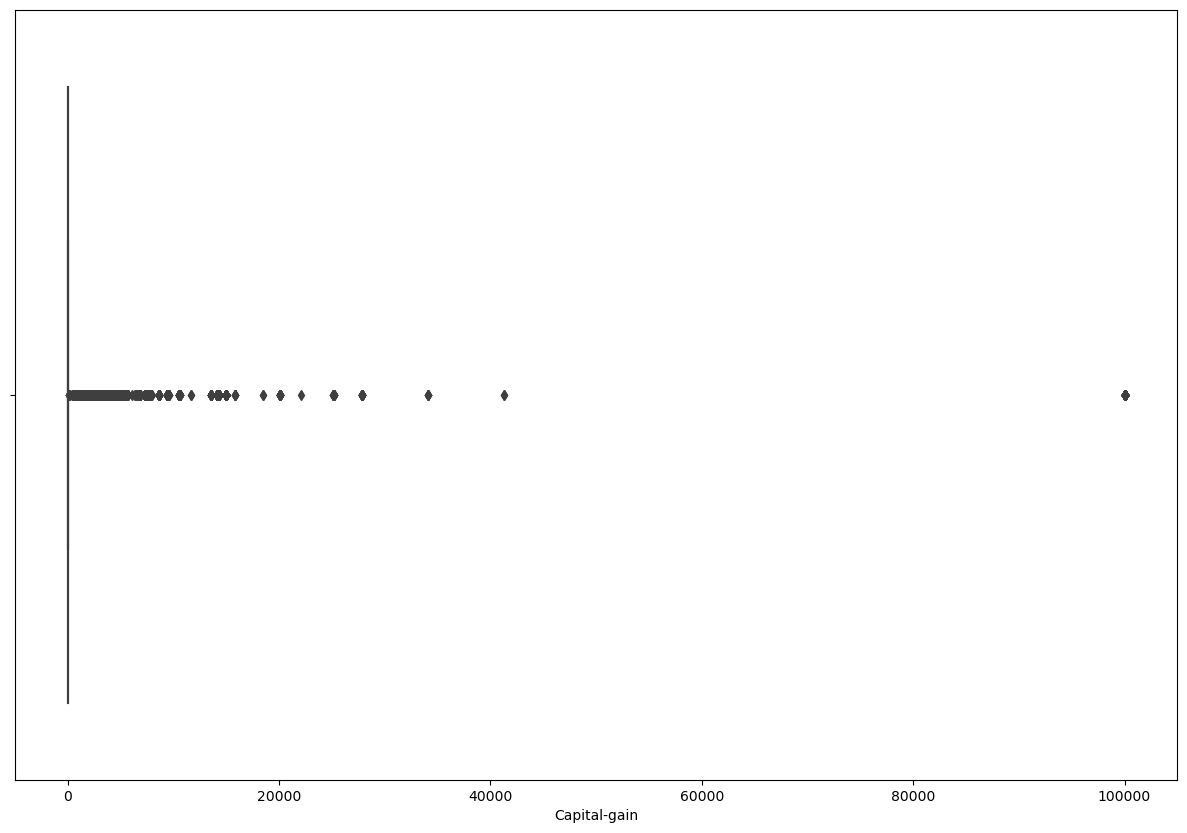

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Capital-gain'])
plt.show()

That just looks like a lot of outliers as almost all of our data was centered towards 0 impling very few people got a capital gain. Without much capital gain, it is difficult to break the <=50k barrier. That would help explain why so many people in the survey had a income potential of <=50k.

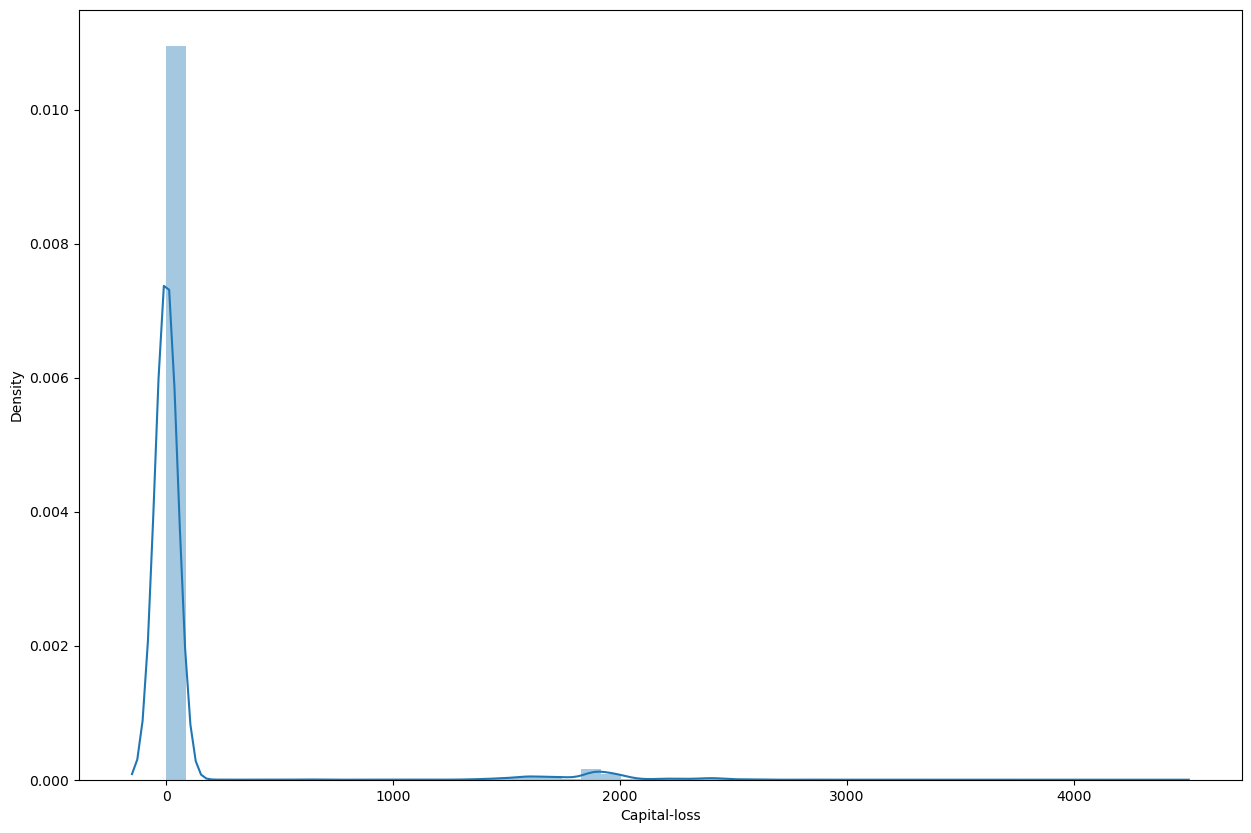

In [66]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-loss'])
plt.show()

We again see the data is centered towards 0 with some outliers near 2000. We will have to clean or scale this data.



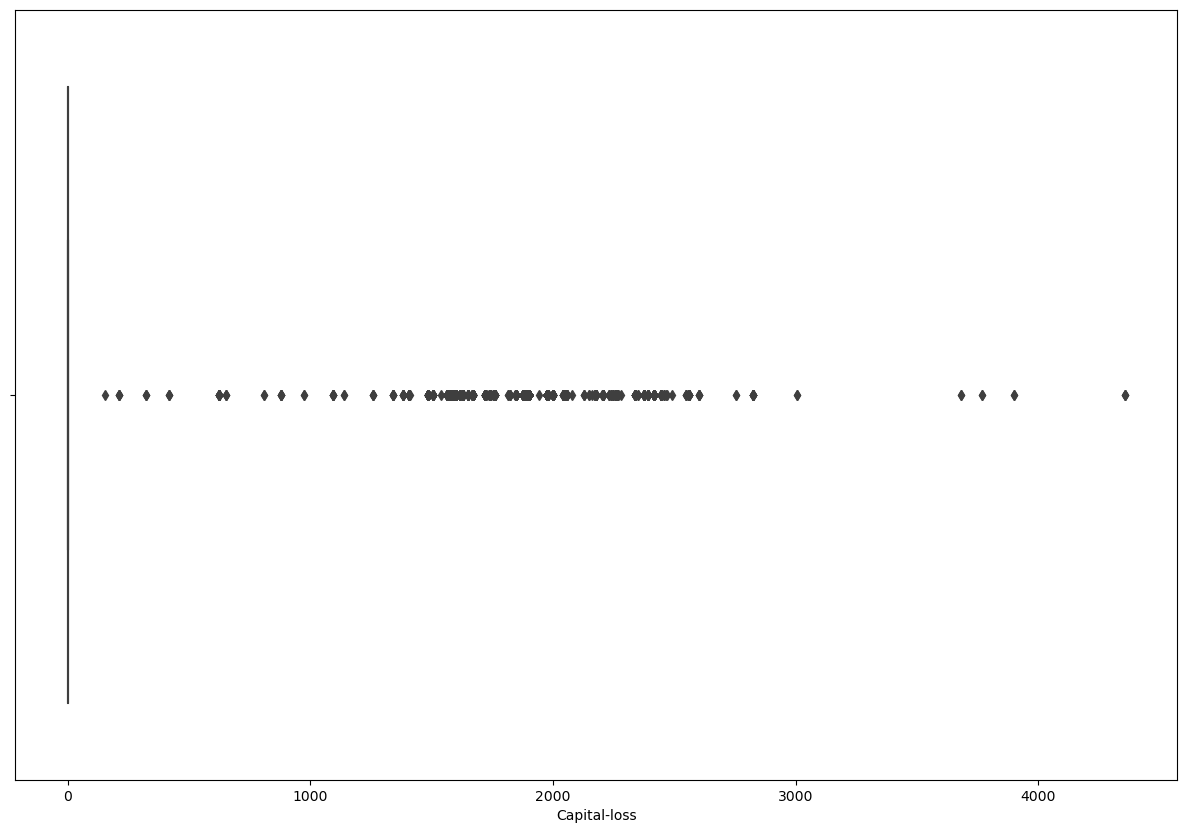

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Capital-loss'])
plt.show()

Again, there are a large amount of people with no capital loss. We also saw a large amount of people do not have any capital gain either. So maybe people in our sample do not invest or have passive income or take risks and so on. This is kind of sad to see. But at least there were not large losses. The highest loss we see is somewhere in the range of 5000.

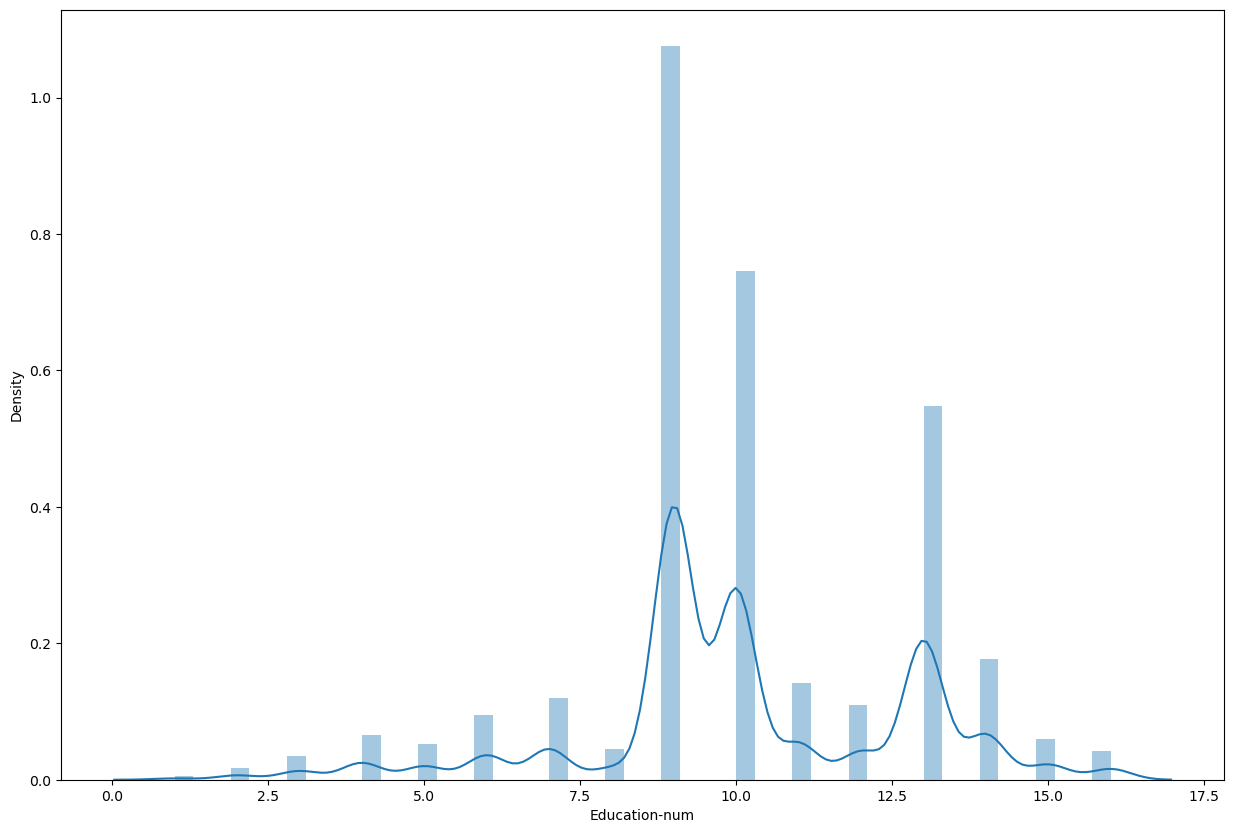

In [68]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Education-num'])
plt.show()

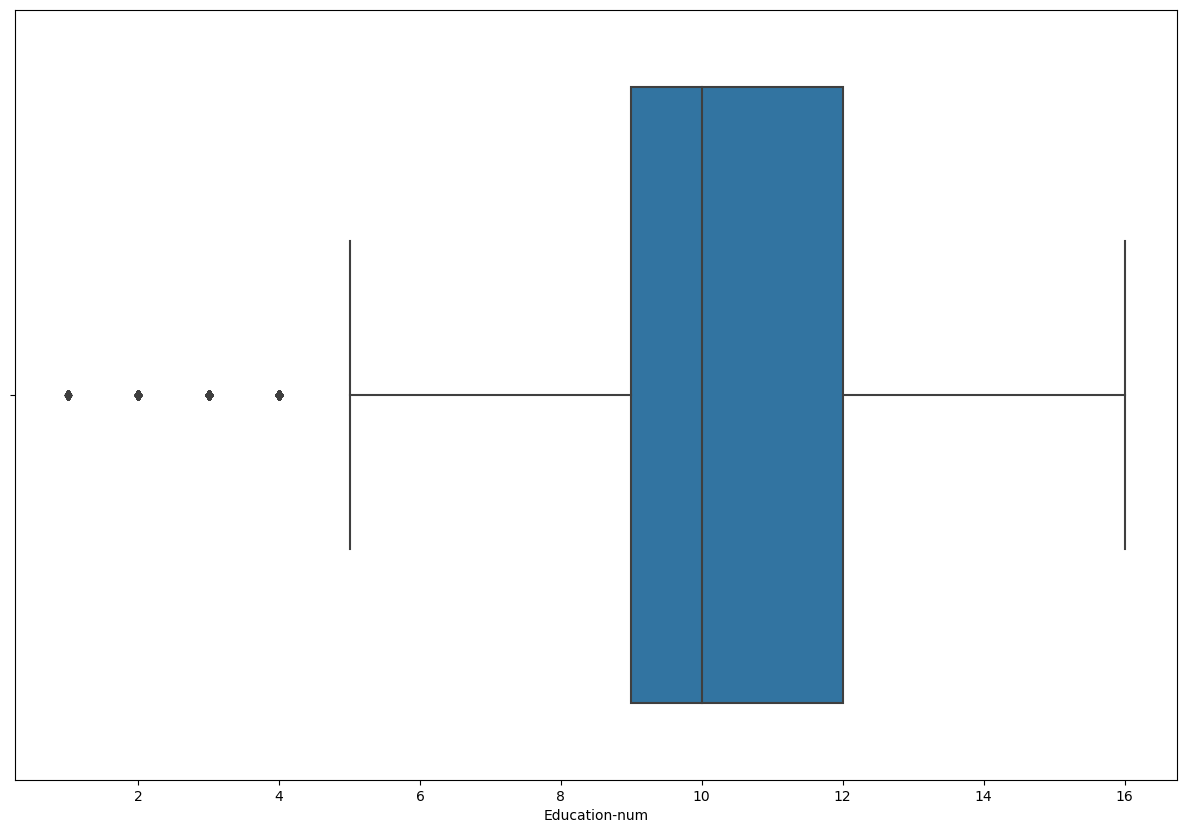

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Education-num'])
plt.show()

We see that most of the people fall within the 9-12 range with data skewed towards the left. Which is the HS-grad part of the graph. And few people are well below our education number threshold at 4 to 1.

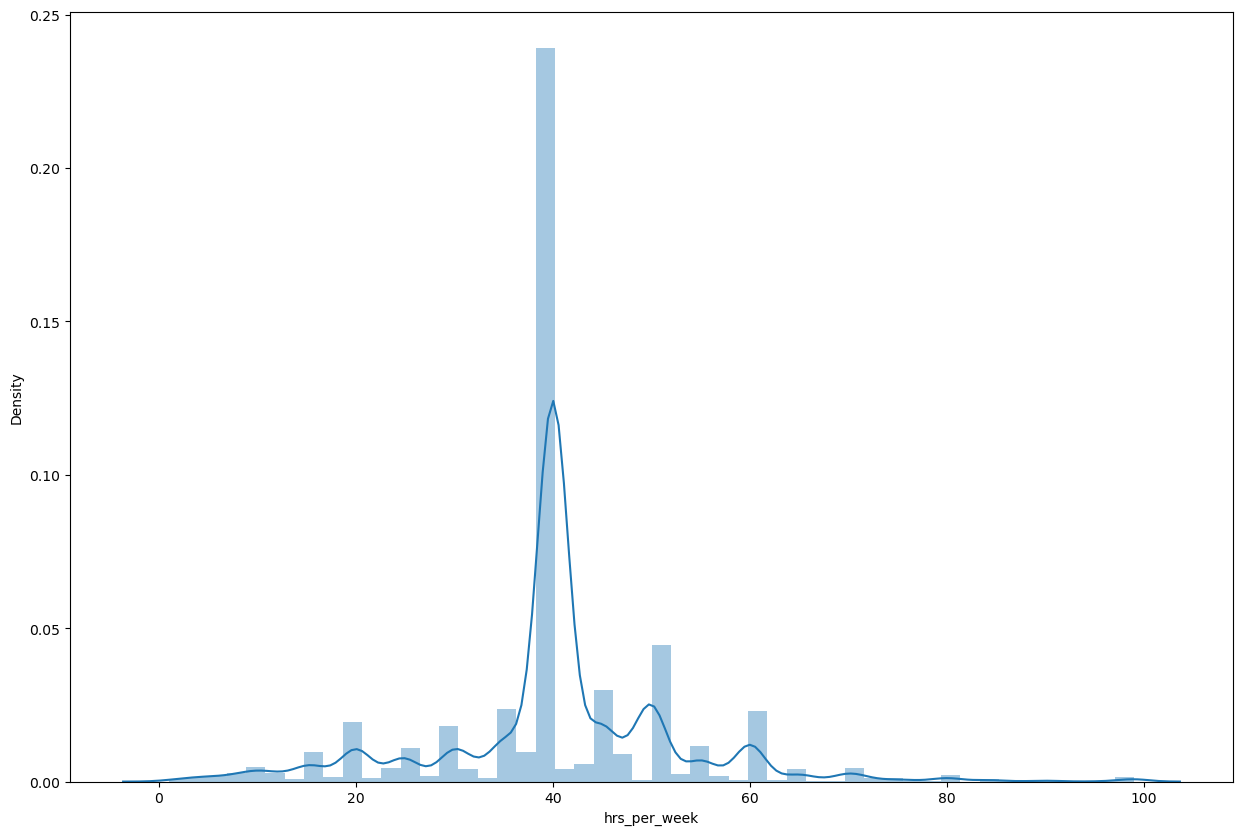

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['hrs_per_week'])
plt.show()

We see that a lot of people work around 40 hours per week. We see there are some people who work towards the 0 side of the graph. They may be people who work without pay and those who do not get paid at all. We will check for those as well.

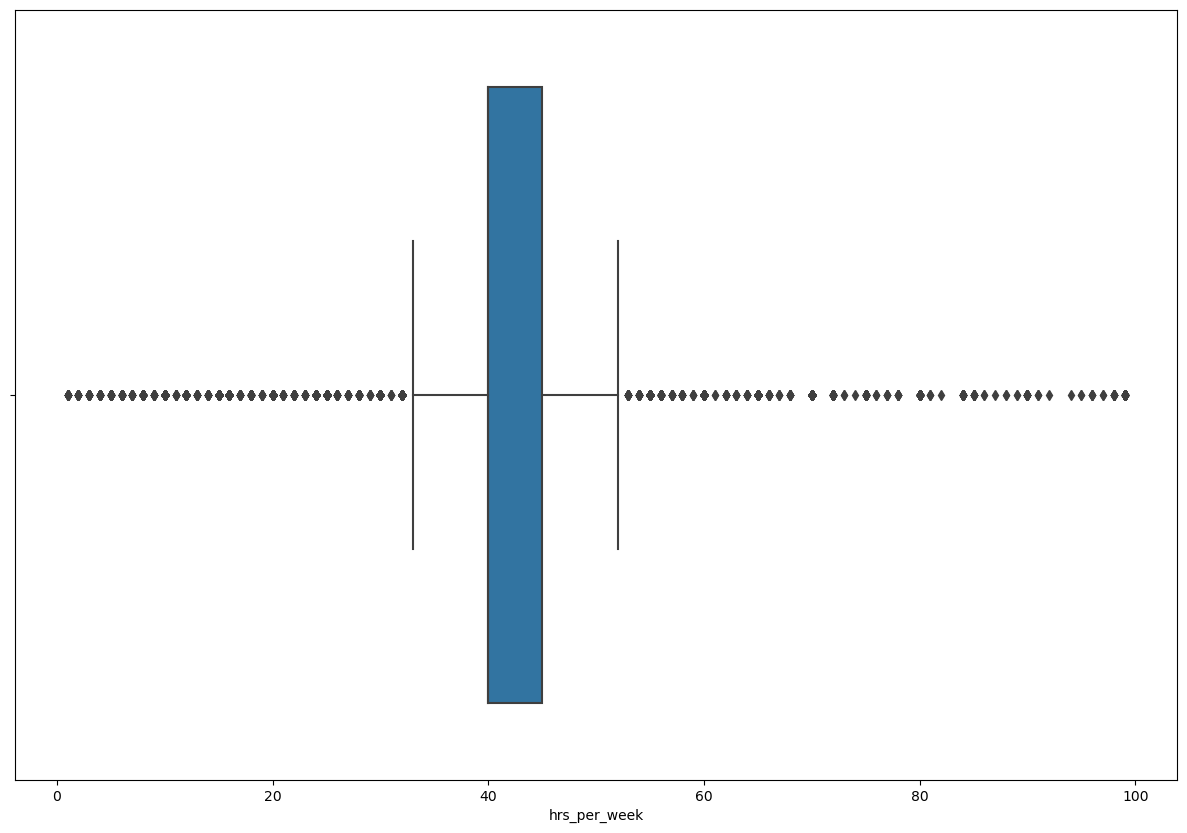

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['hrs_per_week'])
plt.show()

We see a lot of people work 40 hour weeks but that ranges from 30-50. However a lot of people people work a lot longer and less than that. Some even work 100 hour weeks! They are either very passionate, or are having a very bad time.

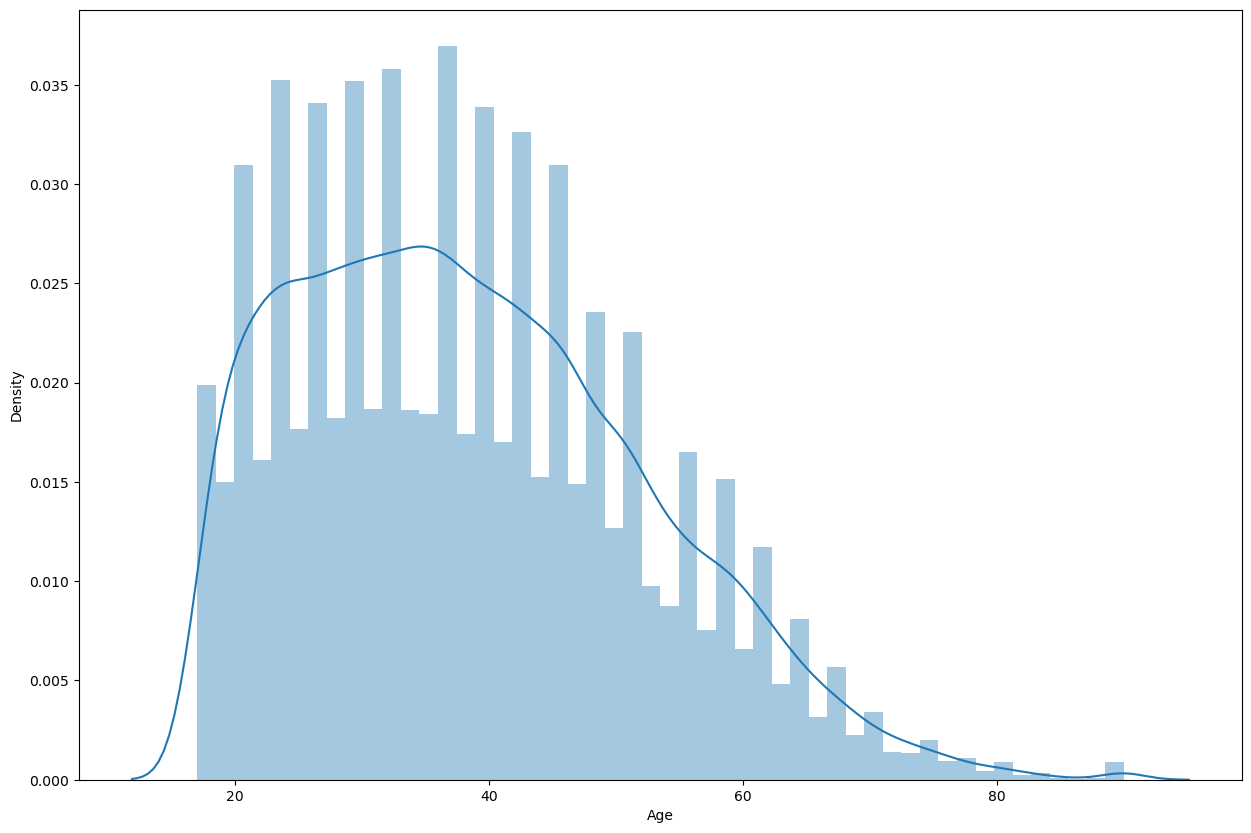

In [72]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Age'])
plt.show()

We see the Age is right skewed as more people at an younger age work in this survey.

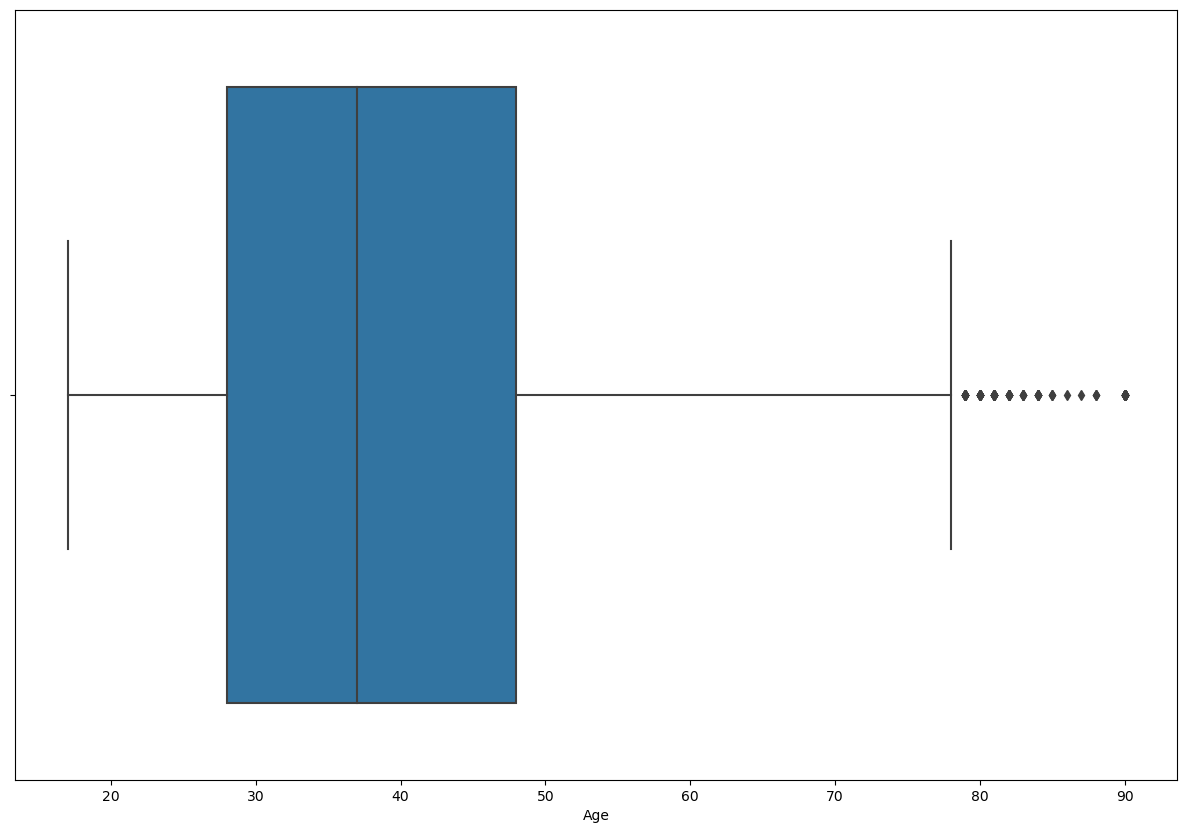

In [73]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Age'])
plt.show()

We see that most people who work are within the age group of 17 to a little less than 80. 80 is... well hats off to them and to those who work well beyond that up to their early 90s. It is facinating to see people work till that age. They must be very passionate about what they do. Or there may be something sadder at play.



In [74]:
#Correlation between the numeric columns.
adult_data.corr()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,hrs_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hrs_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


We see that we see no direct corelation between any of the data. This does not mean that none of the data here is correlated, we just haven't been able to find that correlation yet.
Lets encode and scale our data. That way, our models will have an easier time working with our data.

In [75]:
#preprocessing 
#null value treatment
#filling null values
null_columns = adult_data.columns[adult_data.isnull().any()]
adult_data[null_columns].isnull().sum()

Series([], dtype: float64)

Checking for mode of the Null columns. We can directly check for the mode instead of checking for tyhe type of the columns because we have previously established at the beginning that only 3 categorical columns have null values.

In [76]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [77]:
for i in list(null_columns):
    adult_data[i].fillna(adult_data[i].mode().values[0],inplace=True)

In [41]:
print('{null_sum} \n\n {adult_data_info}'.format(null_sum=adult_data.isna().sum(), adult_data_info=adult_data.info()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Age                  0
Workclass          

Now that we have treated our data and cleaned our null values, we can go ahead and encode our data.

In [40]:
#label encoding
#Label Encoding our categorical columns. We can one hot encode them too but that's a whole different thing in itself.


adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [42]:
label_encoder = LabelEncoder()
encoded_adult_data = adult_data
for i in categorical_columns:
    encoded_adult_data[i] = label_encoder.fit_transform(adult_data[i])
encoded_adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [43]:
#scaling data
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data = pd.DataFrame()

column_values = encoded_adult_data.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['Earning_potential'] = encoded_adult_data['Earning_potential']
scaled_encoded_adult_data.sample(10)

# encoded_adult_data.head()

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
25035,0.438356,0.750,0.110931,0.600000,0.800000,0.333333,0.714286,0.0,1.00,1.0,0.0,0.0,0.397959,0.951220,1
25946,0.287671,0.750,0.111634,1.000000,0.600000,0.833333,0.857143,0.2,0.25,1.0,0.0,0.0,0.602041,0.585366,0
17165,0.369863,0.625,0.014154,1.000000,0.600000,0.333333,0.285714,0.0,1.00,1.0,0.0,0.0,0.806122,0.951220,0
25105,0.287671,0.500,0.209292,0.800000,0.866667,0.333333,0.714286,0.0,0.25,1.0,0.0,0.0,0.397959,0.000000,0
21857,0.041096,0.000,0.017418,0.733333,0.533333,0.666667,0.000000,0.2,1.00,1.0,0.0,0.0,0.397959,0.951220,0
32021,0.397260,0.500,0.135112,0.466667,0.733333,0.333333,1.000000,0.0,0.75,1.0,0.0,0.0,0.357143,0.951220,0
8815,0.232877,0.500,0.063656,1.000000,0.600000,0.666667,0.571429,0.2,1.00,1.0,0.0,0.0,0.397959,0.951220,0
25212,0.479452,0.125,0.132813,1.000000,0.600000,0.333333,0.071429,0.0,1.00,1.0,0.0,0.0,0.397959,0.951220,0
30406,0.150685,0.500,0.095938,0.066667,0.400000,0.000000,0.571429,0.8,1.00,0.0,0.0,0.0,0.397959,0.951220,0
29360,0.767123,0.000,0.075427,0.733333,0.533333,1.000000,0.000000,0.2,1.00,0.0,0.0,0.0,0.653061,0.951220,0


In [44]:
scaled_encoded_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                32561 non-null  float64
 1   Workclass          32561 non-null  float64
 2   fnlwgt             32561 non-null  float64
 3   Education          32561 non-null  float64
 4   Education-num      32561 non-null  float64
 5   Marital_Status     32561 non-null  float64
 6   Occupation         32561 non-null  float64
 7   Relationship       32561 non-null  float64
 8   Race               32561 non-null  float64
 9   Sex                32561 non-null  float64
 10  Capital-gain       32561 non-null  float64
 11  Capital-loss       32561 non-null  float64
 12  hrs_per_week       32561 non-null  float64
 13  Native-Country     32561 non-null  float64
 14  Earning_potential  32561 non-null  int32  
dtypes: float64(14), int32(1)
memory usage: 3.6 MB


In [45]:
scaled_encoded_adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
Workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


Outlier detection

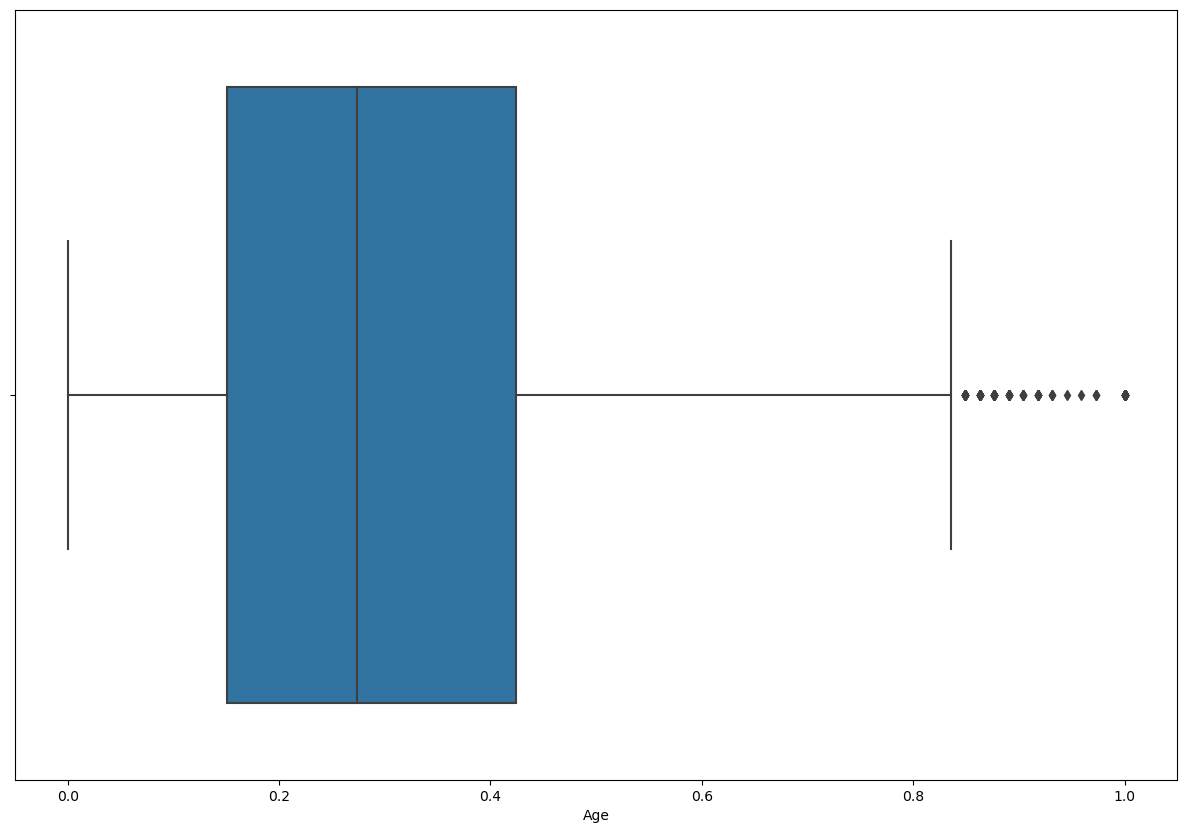

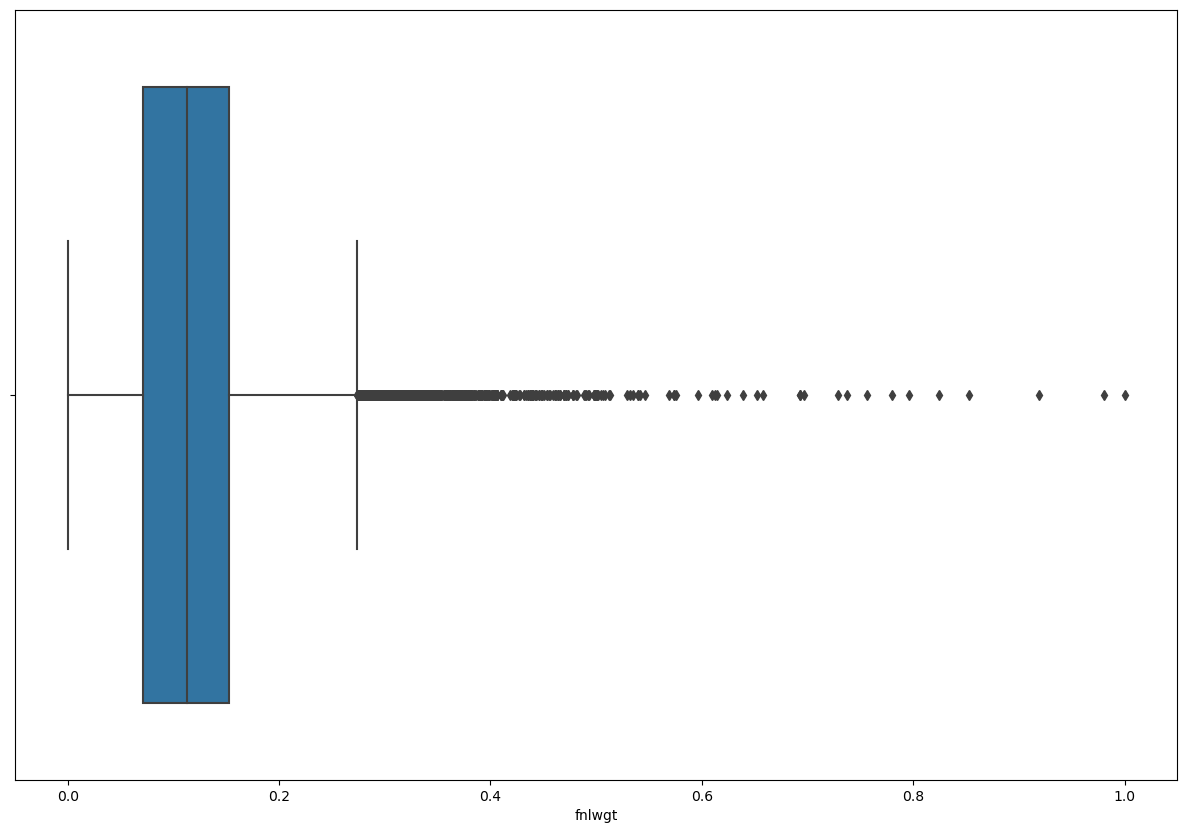

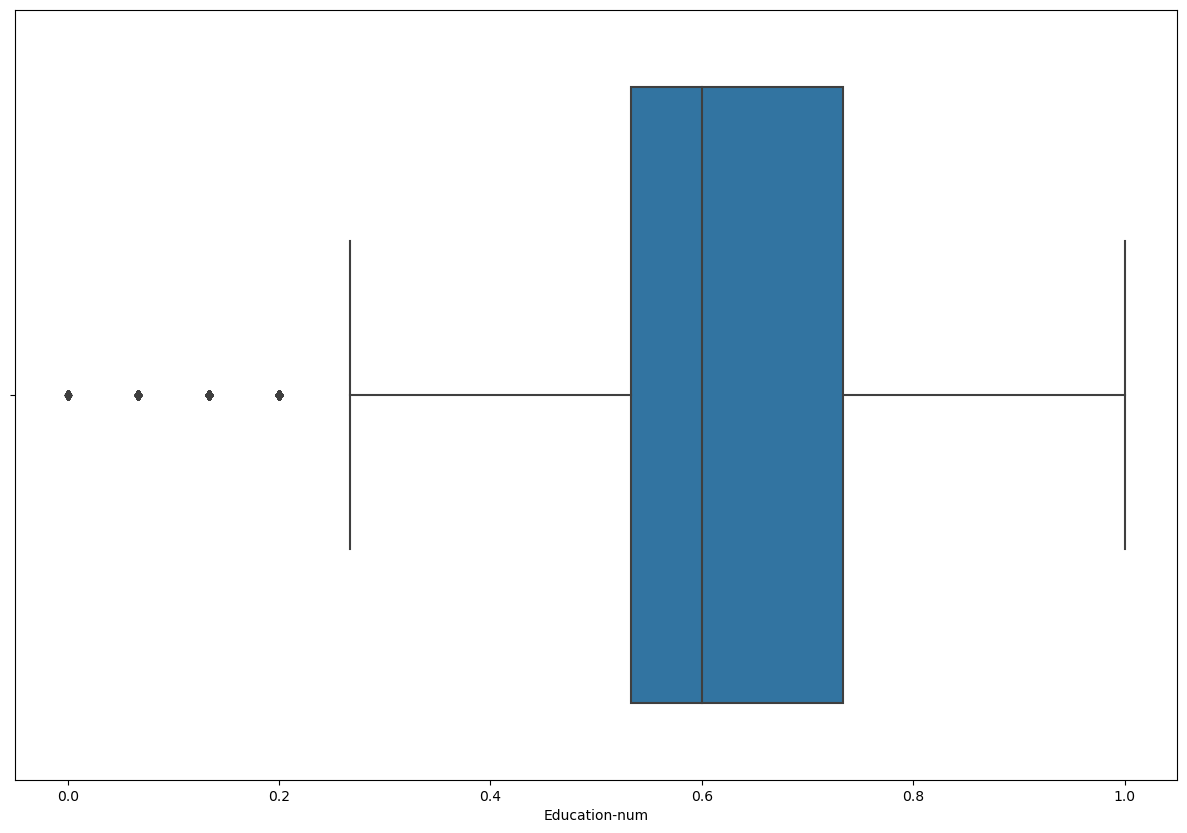

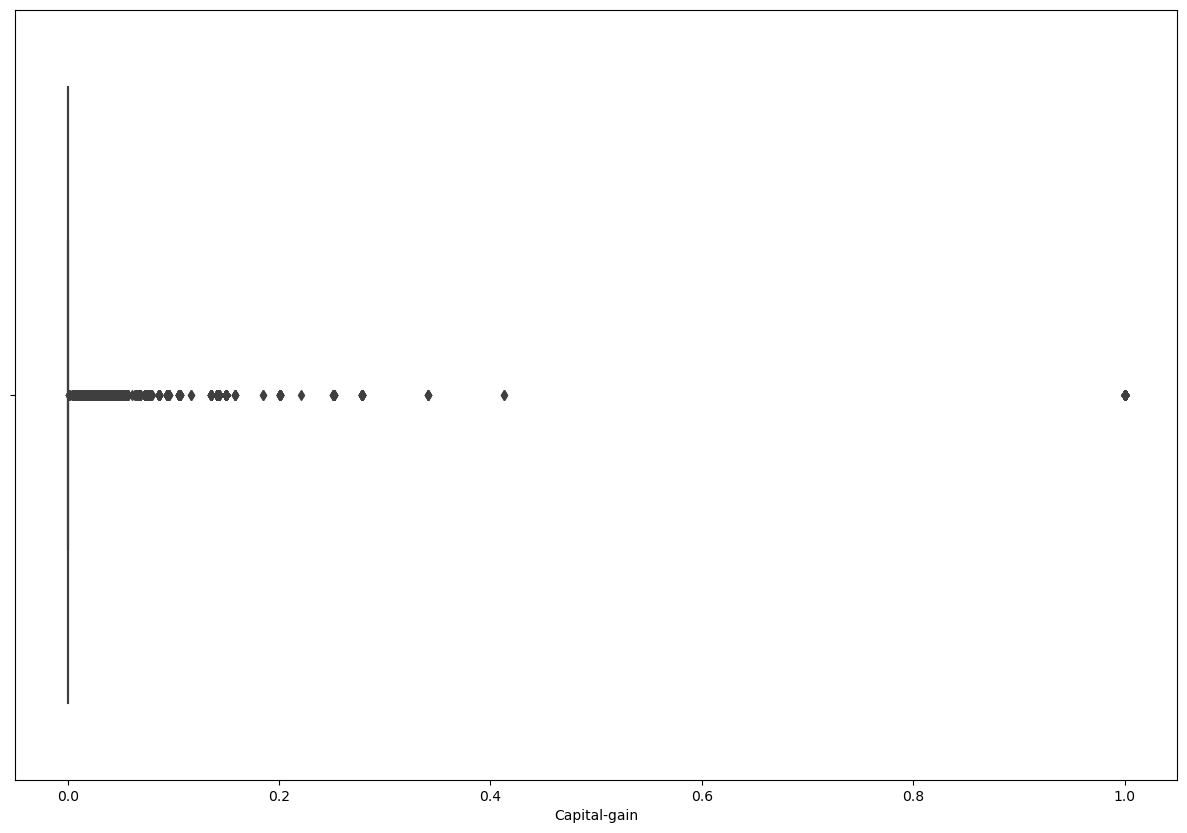

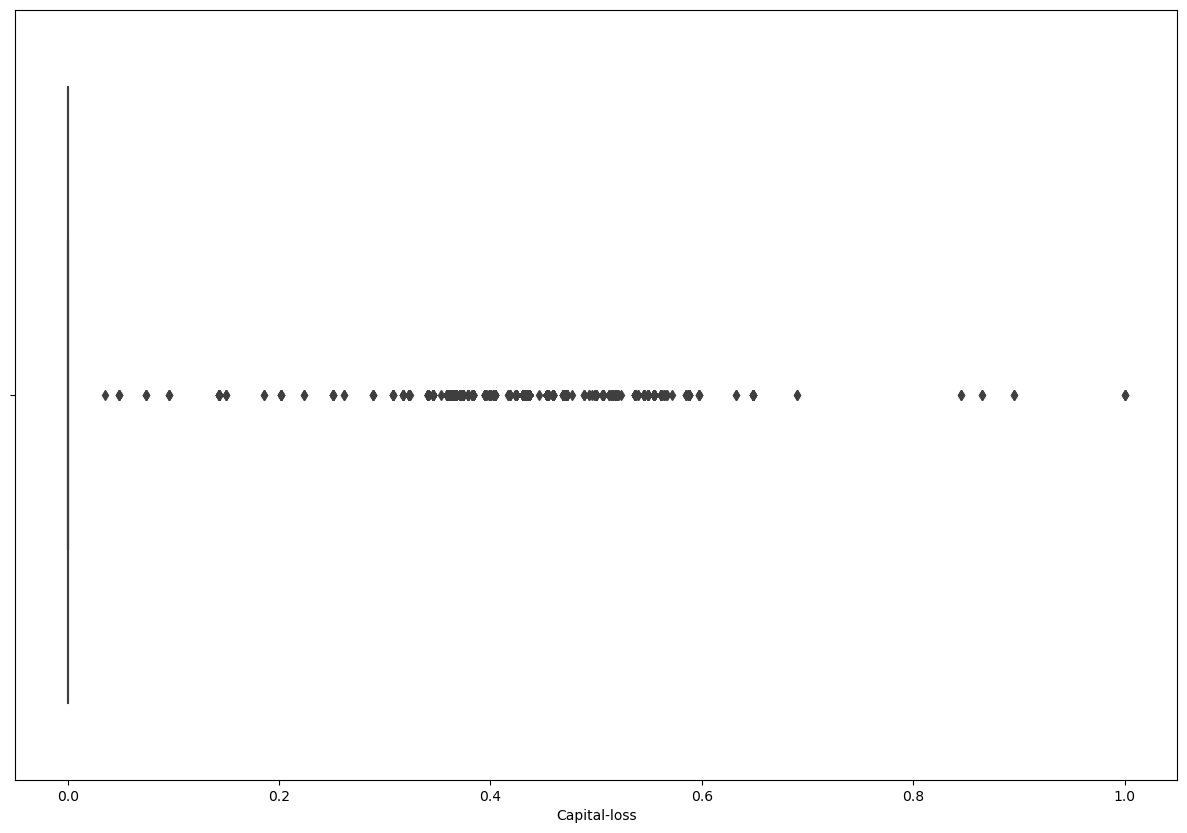

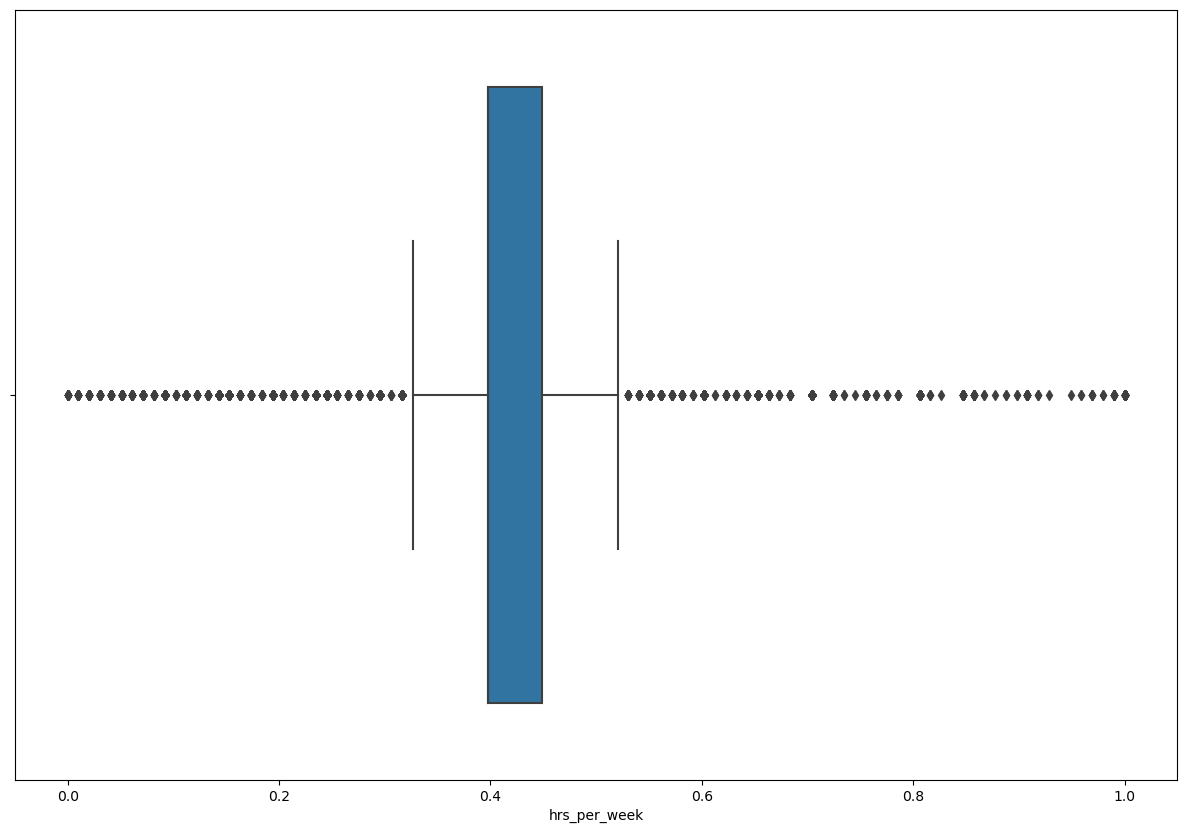

In [46]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data[numerical_columns[i]])
plt.show() 

As we can see in the graphs above, Scaling does nothing to the distribution and does not deal with the outliers either. We have to take care of the outliers.

If the columns are continuous, we replace the outliers with the value of the medians and if they are categorical, we replace the outliers with the mode.
We have already established the numeric and categorical columns. So, it will be easier for us to deal with them now.

In [32]:
#outlier treatment - replace with median
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound
# This takes a column of the dataframe (a series), 
# checks for the percentile we want to check it for and then calculates and the upper and lower bounds

In [47]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [48]:
scaled_encoded_adult_data[(scaled_encoded_adult_data.Age < lowerbound) | (scaled_encoded_adult_data.Age > upperbound)]


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
74,0.849315,0.500,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.00,1.0,0.000000,0.000000,0.193878,0.951220,0
222,1.000000,0.500,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.50,1.0,0.000000,0.506428,0.397959,0.951220,0
430,0.863014,0.000,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,0.234694,0.951220,0
918,0.876712,0.750,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
1040,1.000000,0.500,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.00,0.0,0.000000,0.000000,0.397959,0.951220,0
1168,0.972603,0.750,0.131760,0.933333,0.933333,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220,0
1935,1.000000,0.500,0.142315,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.448980,0.951220,0
2303,1.000000,0.500,0.027235,1.000000,0.600000,0.666667,0.571429,0.2,0.25,1.0,0.000000,0.000000,0.346939,0.951220,0
2754,0.863014,0.750,0.116848,0.333333,0.200000,0.333333,0.357143,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
2891,1.000000,0.500,0.108441,1.000000,0.600000,0.833333,0.071429,0.6,1.00,0.0,0.000000,0.000000,0.397959,0.804878,0


In [52]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') #Sparse column, must not be treated
new_columns.remove('Capital-loss') #Sparse column, must not be treated
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

In [51]:
treated_scaled_encoded_adult_data = scaled_encoded_adult_data.copy()
for i in new_columns:
    lowerbound, upperbound = outlier_detector(treated_scaled_encoded_adult_data[i])
    median = treated_scaled_encoded_adult_data[i].median()
    treated_scaled_encoded_adult_data[i] = treated_scaled_encoded_adult_data[i].replace(
        to_replace = treated_scaled_encoded_adult_data[(treated_scaled_encoded_adult_data[i] < lowerbound) | 
                                                       (treated_scaled_encoded_adult_data[i] > upperbound)][i],
                                      value = median)
    

ValueError: Series.replace cannot use dict-like to_replace and non-None value

Now that we have treated our outliers, we can now go ahead and plot a correlation heatmap.

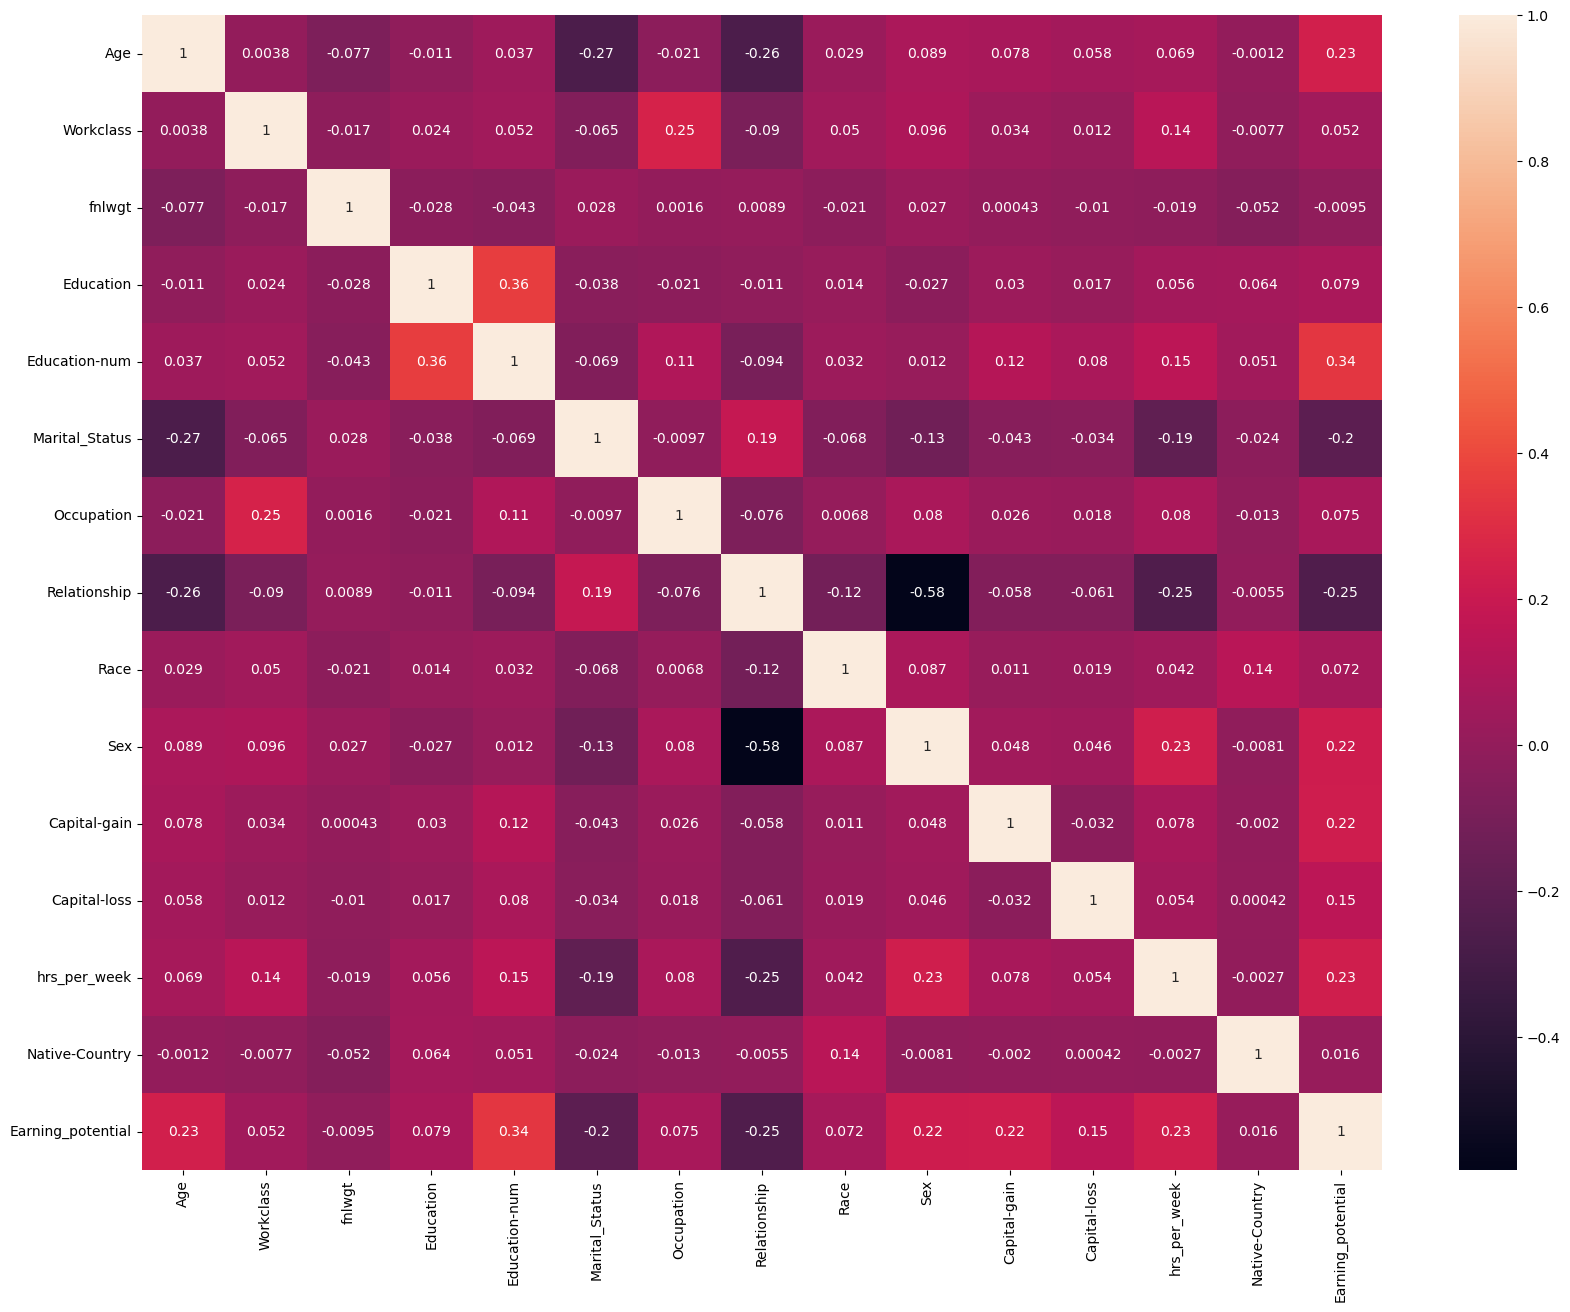

In [53]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_scaled_encoded_adult_data.corr(),annot=True)

From the heatmap we see that none of the columns are correlated to each other,
i.e. None of them have a correlation value of >0.7 or <-0.7. So we must find another way to find our features.
Selecting all features and the target column

In [54]:
print(all_columns)

features = all_columns[:-1]
target = treated_scaled_encoded_adult_data['Earning_potential']
print(features)
print(treated_scaled_encoded_adult_data.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']
(32561, 15)


We will now make a new dataframe and use it for our train test splitting.

In [55]:
#Copy of main dataframe to use for model training
feature_df = treated_scaled_encoded_adult_data[features]
print(target.head())
feature_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Earning_potential, dtype: int32


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


We will not be using PCA for feature extraction because as we have seen before, a lot of columns have very high variance but not necessarity contribute much to the data. So, using PCA will be a bad idea because we might end up picking up high variance data that has nothing to do with our problem.

In [56]:
#Train-validation-test splitting
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(26048, 14) (26048,) (6513, 14) (6513,)


In [57]:
#model building
#logistic regression - 
#We will start with Logistic Regression. Since the target column is a bivariate value, LogisticRegression can be used.
logistic_regressor = LogisticRegression()

logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [58]:
logistic_train_score = logistic_regressor.score(x_train, y_train)
logistic_test_score = logistic_regressor.score(x_test, y_test)
logistic_prediction = logistic_regressor.predict(x_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.8228270884520884
Test Score: 0.8220482112697681


In [59]:
logistic_mse = mean_squared_error(y_test, logistic_prediction)
logistic_rmse = np.sqrt(logistic_mse)
print(logistic_mse, logistic_rmse)

0.17795178873023185 0.42184332249098344


In [62]:

cm = confusion_matrix(y_test, logistic_prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

NameError: name 'confusion_matrix' is not defined

Before we start building our KNN model, we need to check for what value of K does our model have the least error. That will help us build a more optimal model



In [111]:
error_rate = []
# Will take some time
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

11


if index is 12, the value of k should be 2 * index + 1 Thus, The optimum value of K is 25.
This may change if we run this notebook again because we have not set any random state.¶


Text(0, 0.5, 'Error Rate')

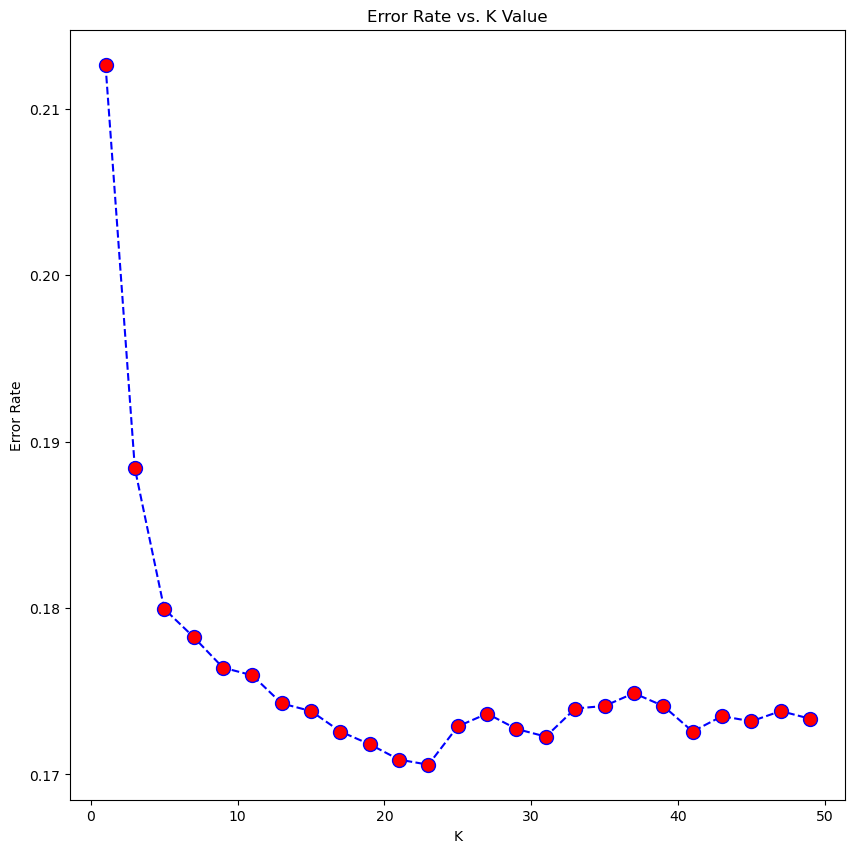

In [112]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We see that the value 19 is the value with the least error. Thus, We will take n_neighbors to be 25 for our model.



In [113]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=25)

In [114]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.847857800982801
Test score: 0.8271150007676954


In [115]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.17288499923230463
RMSE: 0.4157944194338166


We see the KNN did a little better than Logistic regression. This can be because of the number of features we have. We shall try other algorithms and see if they perform better.

## Conclusion
### Analysis

As soon as we look at the dataset we realize that this is a US based survey. Mostly, people of the white and black ethinicity took part in the survey but other ethinicities were present as well. There was less biased data when it came to people belonging to the Asian-Pac-Island group where the ratio between people earning more than 50K and those earning less than the same was lower compared to other ethinicities. This dataset also containes information about more males than females. This may be because females did not prefer to take the survey. Also, this dataset is biased towards people making <=50K USD.

As we went through with the analysis, we found many interesting things. Most people usually go and find work right after their Highschool. However, some persue bachelors or higher studies like masters and doctorate or specializations tend to earn more. Some people don't even make it through highschool and these people almost always earn less than 50K which might be because of a lack of skill, education, exposure or more.

We noticed that there is barely any capital gain or capital loss for most people. Which leads us to believe that there is not a lot of growth in economy. However, the amount of gain people make is overwhelming compared to the amount they lose.

With our heatmap, we saw no mathematical correlation but from the other analysis methods we found some insightful information. From this survey we see that a lot of women earn less than 50K. It's just not women, but minorities in Race also seem to earn less.

People tend to work 40 hour weeks but it is not unusual to see people working a lot more or a lot less. And the age group of people working range from a young age of 17 to the age of over 90. It is interesting as people that old work as well. Both of these features combined give tell us that people older than 60 usually tend to work less. Most people who earn more than 50k either work long weeks or short weeks.

### Model Evaluation
We see That none of the models perform very well and so we did not check for any other metric like classification report or the confusion matrix. This may be because of the features we chose. There is very high variance within the data which meant that we should not use PCA for dimentionality reduction as it would only choose features with high variance which doesn't necessarily mean that those features have anything to do with our target. We will have to use Neural networks or better feature extraction methods to get better results.